# Prediction of Protein Expression


## i. Counting Examples: Determine the number of "examples" or spots present in each specimen.


In [171]:
import pandas as pd
import numpy as np
df = pd.read_csv('protein_expression_data.csv')


df['specimen_id']=df.VisSpot.apply(lambda x: x.split('-')[2]) #create specimen id field
df['image_id']=df.VisSpot.apply(lambda x: x.split('-')[2])+'_'+df.id #create image id field
df = df.set_index('image_id').sort_index()
protein_names = ['SMAa', 'CD11b',
       'CD44', 'CD31', 'CDK4', 'YKL40', 'CD11c', 'HIF1a', 'CD24', 'TMEM119',
       'OLIG2', 'GFAP', 'VISTA', 'IBA1', 'CD206', 'PTEN', 'NESTIN', 'TCIRG1',
       'CD74', 'MET', 'P2RY12', 'CD163', 'S100B', 'cMYC', 'pERK', 'EGFR',
       'SOX2', 'HLADR', 'PDGFRa', 'MCT4', 'DNA1', 'DNA3', 'MHCI', 'CD68',
       'CD14', 'KI67', 'CD16', 'SOX10']
print(df)
df.to_csv('modified_data.csv')

          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   
...              ...                    ...                ...   
D1_9x63         3609  CCTCCCGACAATCCCT-1-D1         123.760525   
D1_9x65          172  AACACGACTGTACTGA-1-D1          29.281573   
D1_9x67         2686  CACCGCCGACCAGCGA-1-D1         938.403662   
D1_9x69         2813  CAGAGTGATTTAACGT-1-D1         844.093656   
D1_9x71         6877  GTCAGTTGTGCTCGTT-1-D1         740.107483   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                    

In [172]:
train_specimens = ["A1","B1","D1"]
train_df = df[df["specimen_id"].isin(train_specimens)]
test_df = df[df["specimen_id"] == "C1"]

In [173]:
print("Training DataFrame: ")
print(train_df)
print("\nTest DataFrame: ")
print(test_df)


Training DataFrame: 
          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   
...              ...                    ...                ...   
D1_9x63         3609  CCTCCCGACAATCCCT-1-D1         123.760525   
D1_9x65          172  AACACGACTGTACTGA-1-D1          29.281573   
D1_9x67         2686  CACCGCCGACCAGCGA-1-D1         938.403662   
D1_9x69         2813  CAGAGTGATTTAACGT-1-D1         844.093656   
D1_9x71         6877  GTCAGTTGTGCTCGTT-1-D1         740.107483   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                               

In [174]:
train_specimen_counts = train_df.groupby("specimen_id").size()
print("Number of examples for each specimen_id: ")
print(train_specimen_counts)

Number of examples for each specimen_id: 
specimen_id
A1    2894
B1    1145
D1    1753
dtype: int64


In [175]:
test_specimen_counts = test_df.groupby("specimen_id").size()
print("Number of examples for each specimen_id: ")
print(test_specimen_counts)

Number of examples for each specimen_id: 
specimen_id
C1    4129
dtype: int64


## ii. Protein Expression Histograms: For each specimen, generate histograms to visualize the expression values of 'NESTIN', 'cMYC', and 'MET' and discuss your observations.

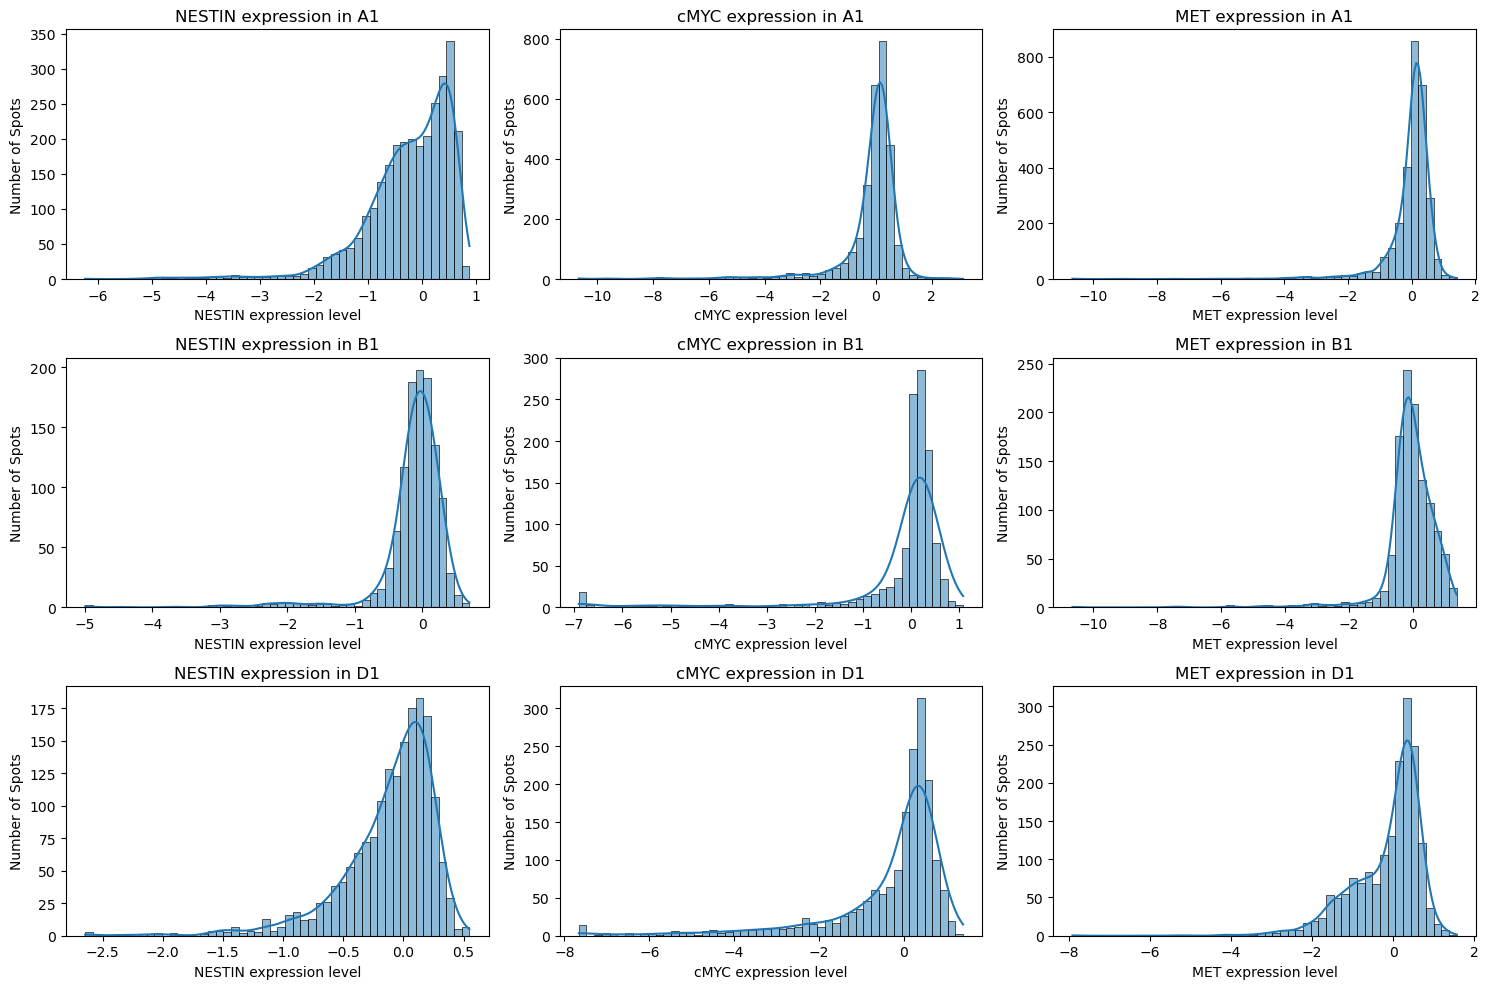

In [236]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
proteins = ["NESTIN","cMYC","MET"]
specimens = train_df["specimen_id"].unique()

rows, cols = 3,3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), tight_layout=True)
plot_index = 0

for specimen in specimens:
  specimen_data = train_df[train_df["specimen_id"] == specimen]
  for protein in proteins:
    ax = axes.flat[plot_index]

    sns.histplot(specimen_data[protein],bins= 50, kde = True, ax = ax)
    ax.set_xlabel(f"{protein} expression level")
    ax.set_ylabel("Number of Spots")
    ax.set_title(f"{protein} expression in {specimen}")

    plot_index += 1
for ax in axes.flat[plot_index:]:
  ax.axis('off')

plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom=0.1)
plt.show()

## iii. Image Pre-processing: Converting a selection of images from RGB to HED color space, focusing on the Hematoxylin channel (H) to highlight cellular nuclei. Providing visual examples and follow the hints in the provided notebook.

skimage version 0.22.0


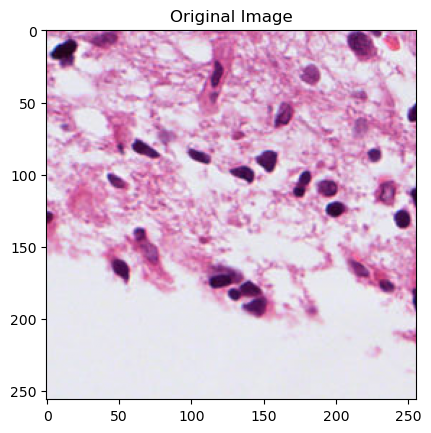

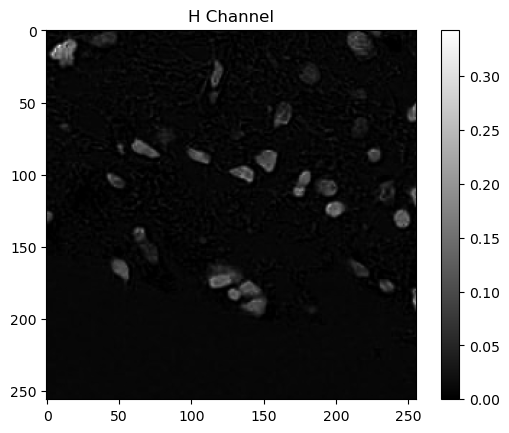

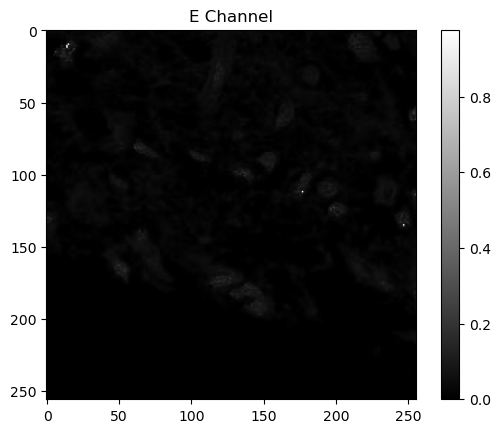

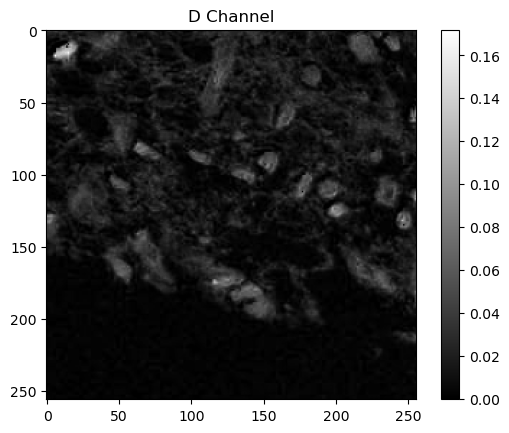

In [178]:
image_folder = 'train_patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt

# Replace 'path_to_image' with the path to the image you want to display
image_path = image_folder+'A1_0x40.png'
print('skimage version',skimage.__version__)
import matplotlib.pyplot as plt
I = rgba2rgb(imread(image_path)) #read sample RGB image
I_hed =  rgb2hed(I) #convert to HED
plt.imshow(I);plt.title('Original Image');plt.show()
I_h = I_hed[:,:,0]; plt.figure(); plt.imshow(I_h,cmap='gray');plt.colorbar();plt.title('H Channel');plt.show()
I_e = I_hed[:,:,1]; plt.figure();  plt.imshow(I_e,cmap='gray');plt.colorbar();plt.title('E Channel');plt.show()
I_d = I_hed[:,:,2]; plt.figure();  plt.imshow(I_d,cmap='gray');plt.colorbar();plt.title('D Channel');plt.show()

skimage version 0.22.0


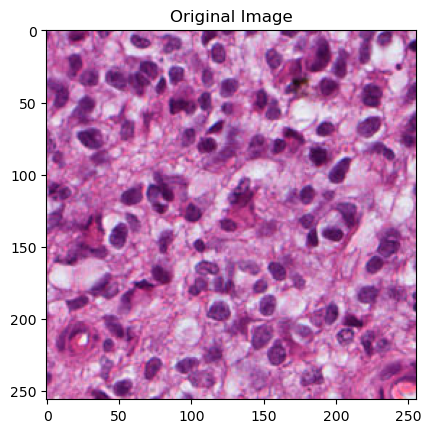

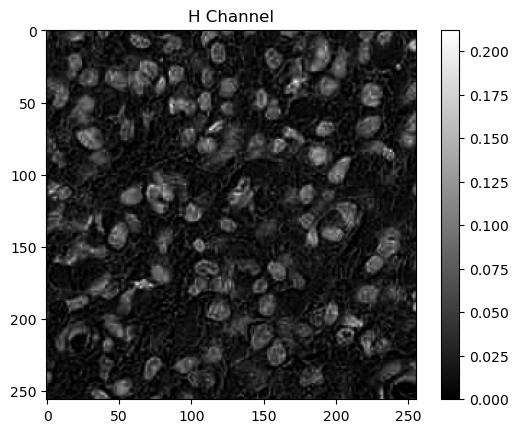

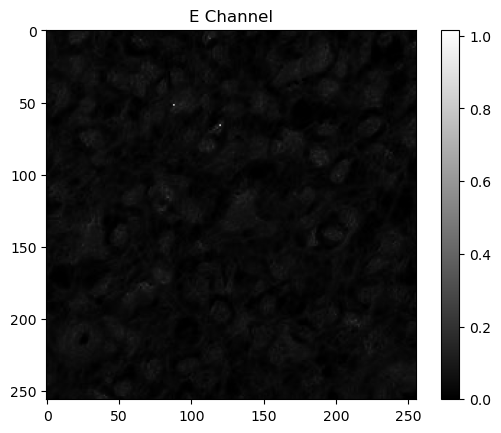

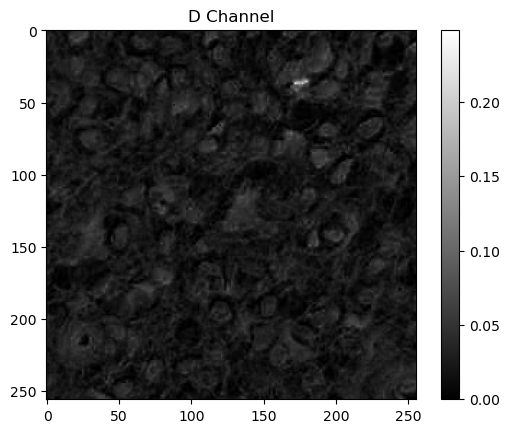

In [179]:
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt

# Replace 'path_to_image' with the path to the image you want to display
image_path = image_folder+'B1_68x32.png'
print('skimage version',skimage.__version__)
import matplotlib.pyplot as plt
I = rgba2rgb(imread(image_path)) #read sample RGB image
I_hed =  rgb2hed(I) #convert to HED
plt.imshow(I);plt.title('Original Image');plt.show()
I_h = I_hed[:,:,0]; plt.figure(); plt.imshow(I_h,cmap='gray');plt.colorbar();plt.title('H Channel');plt.show()
I_e = I_hed[:,:,1]; plt.figure();  plt.imshow(I_e,cmap='gray');plt.colorbar();plt.title('E Channel');plt.show()
I_d = I_hed[:,:,2]; plt.figure();  plt.imshow(I_d,cmap='gray');plt.colorbar();plt.title('D Channel');plt.show()

## iv. H-channel Analysis: Calculate the average intensity of the H-channel for each image. Create a scatter plot comparing these averages against the expression levels of NESTIN for each image. Assess the correlation between H-channel intensity and NESTIN expression. Discuss the potential of H-channel average as a predictive feature for NESTIN expression

Correlation coefficient using average: 0.5042521722654018


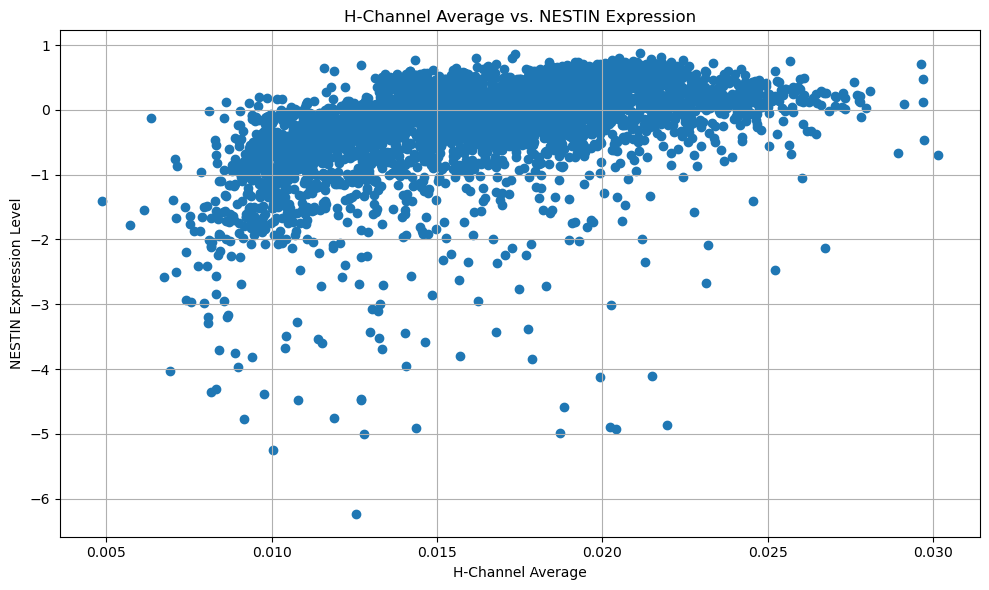

In [180]:
image_folder = 'train_patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt

h_channel_average = []
nestin_expression_level = []

for idx in train_df.index:
    image_path = image_folder + train_df["specimen_id"][idx] + "_" + train_df['id'][idx] + ".png"
    
    try:
        I = rgba2rgb(imread(image_path))
        I_hed = rgb2hed(I)
        I_h = I_hed[:, :, 0]
    except:
        I = imread(image_path)
        I_hed = rgb2hed(I)
        I_h = I_hed[:, :, 0]
        
    else:
        h_channel_average.append(I_h.mean())
        nestin_expression_level.append(train_df['NESTIN'][idx])

plt.figure(figsize=(10, 6))
plt.scatter(h_channel_average, nestin_expression_level)
plt.xlabel('H-Channel Average')
plt.ylabel('NESTIN Expression Level')
plt.title('H-Channel Average vs. NESTIN Expression')
plt.grid(True)


correlation_coefficient = np.corrcoef(h_channel_average, nestin_expression_level)[0, 1]
print('Correlation coefficient using average:', correlation_coefficient)



plt.tight_layout()
plt.show()

1) The results show a moderate positive trend between the intensity of the H-channel and NESTIN expression levels. The correlation coefficient (0.504) suggests that as the H-channel intensity increases, NESTIN expression tends to increase as well, but not perfectly.
2) Even at higher H-channel intensity levels, there's a large variation in NESTIN expression levels. This suggests that H-channel intensity alone cannot fully explain the changes in NESTIN expression. There might be other factors influencing NESTIN levels.

## v. Performance Metrics for Prediction: Discuss suitable performance metrics for predicting protein expression from images. Identify the most appropriate metric for this specific problem and justify your choice.
 

Two important metrics we can consider
1) Root Mean Square Error (RMSE): RMSE quantifies the average difference between the predicted protein expression levels and the actual measured values. It considers both the magnitude and the direction (positive or negative) of these differences. Lower RMSE indicates better model performance, as it signifies smaller discrepancies between predictions and reality.
2) Pearson Correlation Coefficient: Pearson Correlation measures the strength and direction of the linear relationship between predicted and actual protein expression levels. It ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear relationship. In protein expression prediction, a positive correlation close to 1 suggests the model's predictions tend to increase or decrease along with the actual values, reflecting a good grasp of the underlying trends.


These metrics are well-suited for evaluating the performance of your model predicting protein expression from images for the following reasons:
1) RMSE captures overall prediction accuracy: It considers both the magnitude and direction of errors, providing a comprehensive measure of how close your model's predictions are to the actual values.
2) Pearson Correlation reveals linear relationships: While protein expression might not always have a perfectly linear relationship, capturing the overall trend is crucial. A high positive Pearson Correlation indicates that the model's predictions generally follow the same direction (up or down) as the actual expression levels.

## Feature Extraction and Classical Regression



## For the following questions, use the expression of NESTIN as the output prediction target variable. 

i) Extract features from an image, focusing on the following aspects:
Calculate the average and variance for each of the 'H' (from HED), red, green, and blue channels


Correlation coefficient using average: 0.5042521722654018
Correlation coefficient using variance: 0.20530119813199219


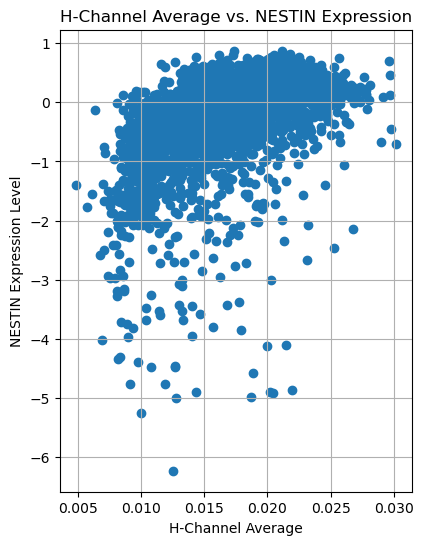

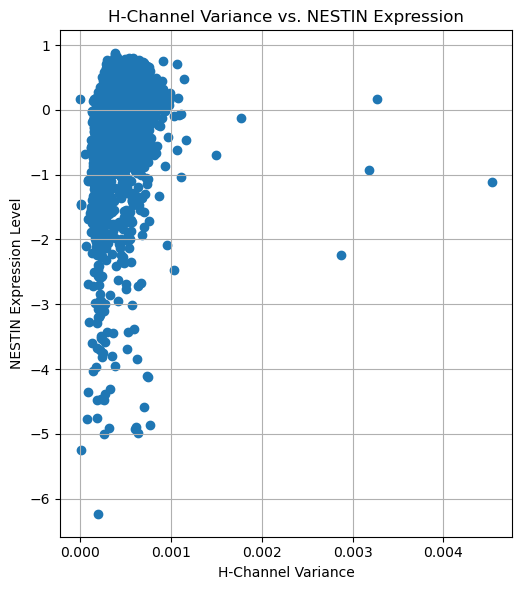

In [181]:
image_folder = 'train_patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt

h_channel_average = []
h_channel_variance = []
nestin_expression_level = []

for idx in train_df.index:
    image_path = image_folder + train_df["specimen_id"][idx] + "_" + train_df['id'][idx] + ".png"
    
    try:
        I = rgba2rgb(imread(image_path))
        I_hed = rgb2hed(I)
        I_h = I_hed[:, :, 0]
    except:
        I = imread(image_path)
        I_hed = rgb2hed(I)
        I_h = I_hed[:, :, 0]
        
    else:
        h_channel_average.append(I_h.mean())
        h_channel_variance.append(I_h.var())
        nestin_expression_level.append(train_df['NESTIN'][idx])

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.scatter(h_channel_average, nestin_expression_level)
plt.xlabel('H-Channel Average')
plt.ylabel('NESTIN Expression Level')
plt.title('H-Channel Average vs. NESTIN Expression')
plt.grid(True)


correlation_coefficient = np.corrcoef(h_channel_average, nestin_expression_level)[0, 1]
print('Correlation coefficient using average:', correlation_coefficient)

plt.figure(figsize=(10, 6))
plt.subplot(122)
plt.scatter(h_channel_variance, nestin_expression_level)
plt.xlabel('H-Channel Variance')
plt.ylabel('NESTIN Expression Level')
plt.title('H-Channel Variance vs. NESTIN Expression')
plt.grid(True)


correlation_coefficient = np.corrcoef(h_channel_variance, nestin_expression_level)[0, 1]
print('Correlation coefficient using variance:', correlation_coefficient)

plt.tight_layout()
plt.show()

Correlation coefficient using average: -0.6006869831100016
Correlation coefficient using variance: 0.2333414330478986


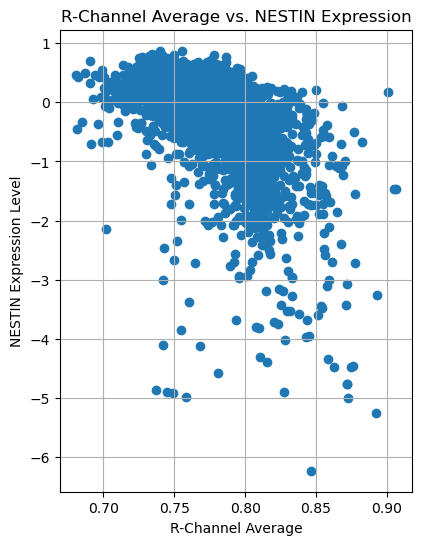

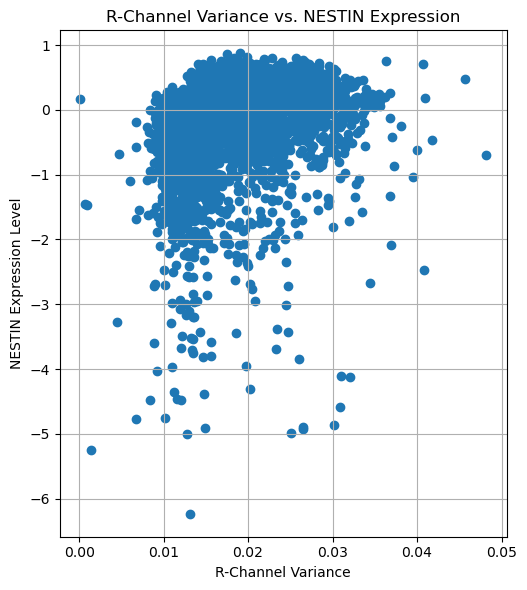

In [182]:
image_folder = 'train_patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt

r_channel_average = []
r_channel_variance = []
nestin_expression_level = []

for idx in train_df.index:
    image_path = image_folder + train_df["specimen_id"][idx] + "_" + train_df['id'][idx] + ".png"
    
    try:
        I = rgba2rgb(imread(image_path))
        I_r = I[:, :, 0]
    except:
        I = imread(image_path)
        I_r = I[:, :, 0]
        
    else:
        r_channel_average.append(I_r.mean())
        r_channel_variance.append(I_r.var())
        nestin_expression_level.append(train_df['NESTIN'][idx])

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.scatter(r_channel_average, nestin_expression_level)
plt.xlabel('R-Channel Average')
plt.ylabel('NESTIN Expression Level')
plt.title('R-Channel Average vs. NESTIN Expression')
plt.grid(True)


correlation_coefficient = np.corrcoef(r_channel_average, nestin_expression_level)[0, 1]
print('Correlation coefficient using average:', correlation_coefficient)

plt.figure(figsize=(10, 6))
plt.subplot(122)
plt.scatter(r_channel_variance, nestin_expression_level)
plt.xlabel('R-Channel Variance')
plt.ylabel('NESTIN Expression Level')
plt.title('R-Channel Variance vs. NESTIN Expression')
plt.grid(True)


correlation_coefficient = np.corrcoef(r_channel_variance, nestin_expression_level)[0, 1]
print('Correlation coefficient using variance:', correlation_coefficient)

plt.tight_layout()
plt.show()

Correlation coefficient using average: -0.3918717865813526
Correlation coefficient using variance: -0.20793899458659854


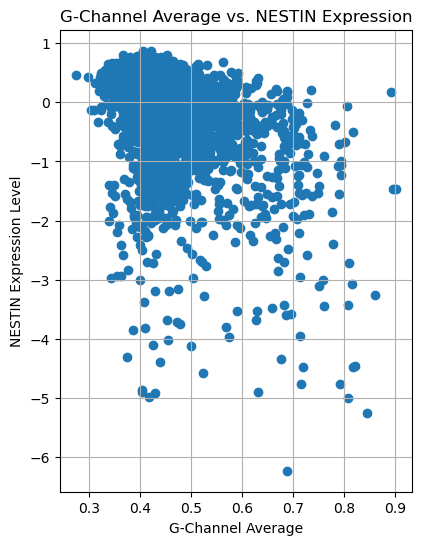

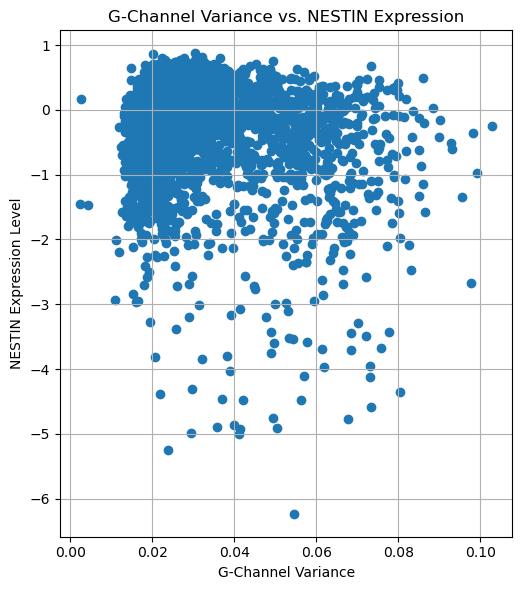

In [183]:
image_folder = 'train_patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt

g_channel_average = []
g_channel_variance = []
nestin_expression_level = []

for idx in train_df.index:
    image_path = image_folder + train_df["specimen_id"][idx] + "_" + train_df['id'][idx] + ".png"
    
    try:
        I = rgba2rgb(imread(image_path))
        I_g = I[:, :, 1]
    except:
        I = imread(image_path)
        I_g = I[:, :, 1]
        
    else:
        g_channel_average.append(I_g.mean())
        g_channel_variance.append(I_g.var())
        nestin_expression_level.append(train_df['NESTIN'][idx])

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.scatter(g_channel_average, nestin_expression_level)
plt.xlabel('G-Channel Average')
plt.ylabel('NESTIN Expression Level')
plt.title('G-Channel Average vs. NESTIN Expression')
plt.grid(True)


correlation_coefficient = np.corrcoef(g_channel_average, nestin_expression_level)[0, 1]
print('Correlation coefficient using average:', correlation_coefficient)

plt.figure(figsize=(10, 6))
plt.subplot(122)
plt.scatter(g_channel_variance, nestin_expression_level)
plt.xlabel('G-Channel Variance')
plt.ylabel('NESTIN Expression Level')
plt.title('G-Channel Variance vs. NESTIN Expression')
plt.grid(True)


correlation_coefficient = np.corrcoef(g_channel_variance, nestin_expression_level)[0, 1]
print('Correlation coefficient using variance:', correlation_coefficient)

plt.tight_layout()
plt.show()

Correlation coefficient using average: -0.31861250710228034
Correlation coefficient using variance: -0.15203428664562968


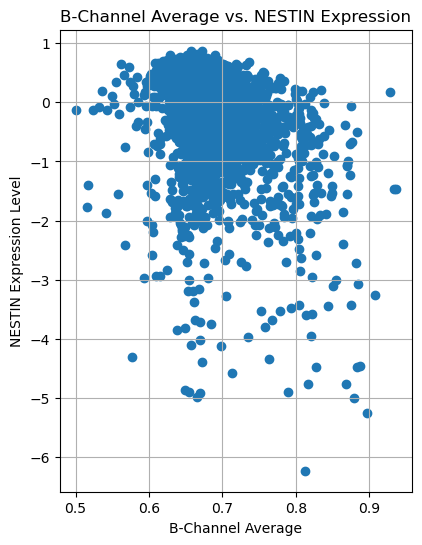

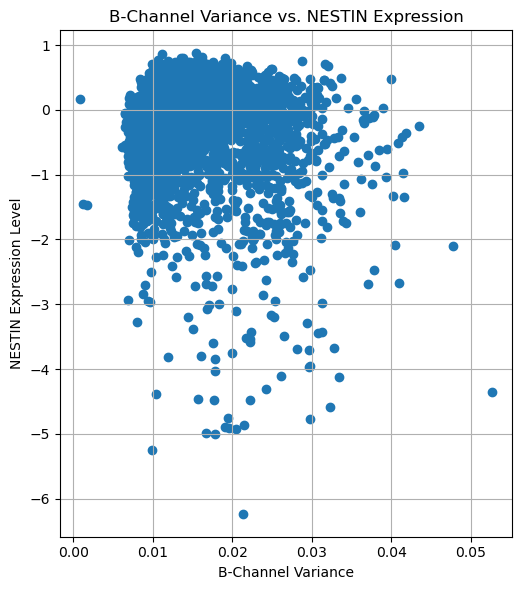

In [184]:
image_folder = 'train_patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt

b_channel_average = []
b_channel_variance = []
nestin_expression_level = []

for idx in train_df.index:
    image_path = image_folder + train_df["specimen_id"][idx] + "_" + train_df['id'][idx] + ".png"
    
    try:
        I = rgba2rgb(imread(image_path))
        I_b = I[:, :, 2]
    except:
        I = imread(image_path)
        I_b = I[:, :, 2]
        
    else:
        b_channel_average.append(I_b.mean())
        b_channel_variance.append(I_b.var())
        nestin_expression_level.append(train_df['NESTIN'][idx])

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.scatter(b_channel_average, nestin_expression_level)
plt.xlabel('B-Channel Average')
plt.ylabel('NESTIN Expression Level')
plt.title('B-Channel Average vs. NESTIN Expression')
plt.grid(True)


correlation_coefficient = np.corrcoef(b_channel_average, nestin_expression_level)[0, 1]
print('Correlation coefficient using average:', correlation_coefficient)

plt.figure(figsize=(10, 6))
plt.subplot(122)
plt.scatter(b_channel_variance, nestin_expression_level)
plt.xlabel('B-Channel Variance')
plt.ylabel('NESTIN Expression Level')
plt.title('B-Channel Variance vs. NESTIN Expression')
plt.grid(True)


correlation_coefficient = np.corrcoef(b_channel_variance, nestin_expression_level)[0, 1]
print('Correlation coefficient using variance:', correlation_coefficient)

plt.tight_layout()
plt.show()

## 2-a) Using PCA and combining with other channels

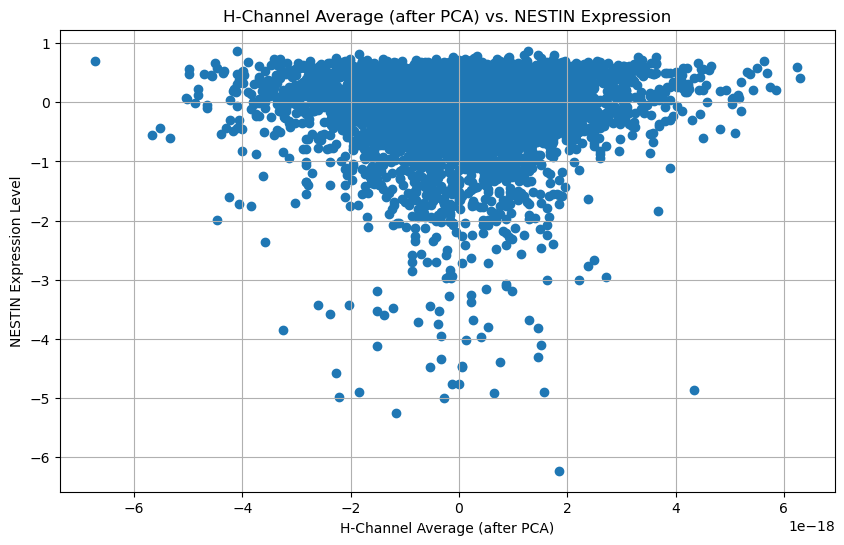

Correlation coefficient: 0.013644575504992887


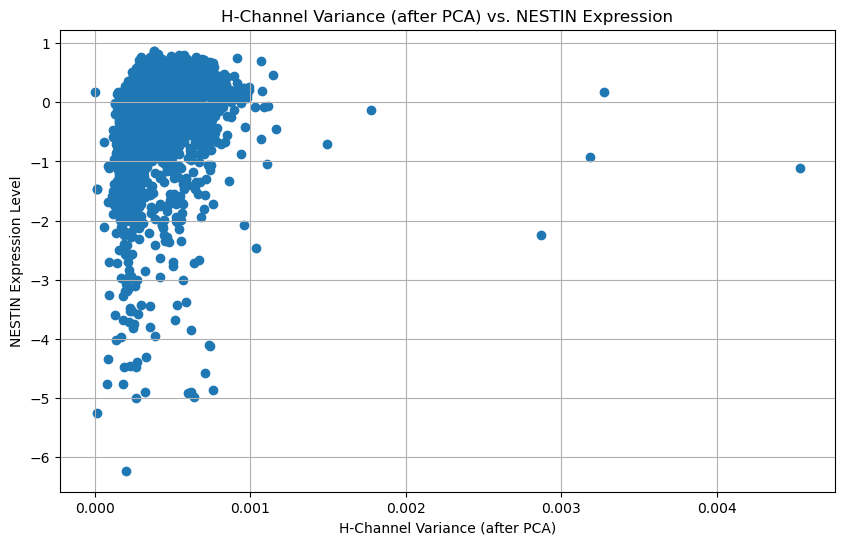

Correlation coefficient: 0.20530119813199224


In [187]:
image_folder = 'train_patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_h_channel_average = []
pca_h_channel_variance = []
nestin_expression_level = []

for idx in train_df.index:
    image_path = image_folder + train_df["specimen_id"][idx] + "_" + train_df['id'][idx] + ".png"
    
    try:
        I = rgba2rgb(imread(image_path))
        I_hed = rgb2hed(I)
        I_h = I_hed[:, :, 0]
    except:
        I = imread(image_path)
        I_hed = rgb2hed(I)
        I_h = I_hed[:, :, 0]
        
    else:
        pca = PCA(n_components=0.95)  
        I_pca = pca.fit_transform(I_h.reshape(-1, 1))
        I_h_pca = I_pca.reshape(I_h.shape)

        # Calculate H-channel intensity after PCA
        pca_h_channel_average.append(I_h_pca.mean())
        pca_h_channel_variance.append(I_h_pca.var())
        nestin_expression_level.append(train_df['NESTIN'][idx])

plt.figure(figsize=(10, 6))
plt.scatter(pca_h_channel_average, nestin_expression_level)
plt.xlabel('H-Channel Average (after PCA)')
plt.ylabel('NESTIN Expression Level')
plt.title('H-Channel Average (after PCA) vs. NESTIN Expression')
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(pca_h_channel_average, nestin_expression_level)[0, 1]
print('Correlation coefficient:', correlation_coefficient)

plt.figure(figsize=(10, 6))
plt.scatter(pca_h_channel_variance, nestin_expression_level)
plt.xlabel('H-Channel Variance (after PCA)')
plt.ylabel('NESTIN Expression Level')
plt.title('H-Channel Variance (after PCA) vs. NESTIN Expression')
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(pca_h_channel_variance, nestin_expression_level)[0, 1]
print('Correlation coefficient:', correlation_coefficient)

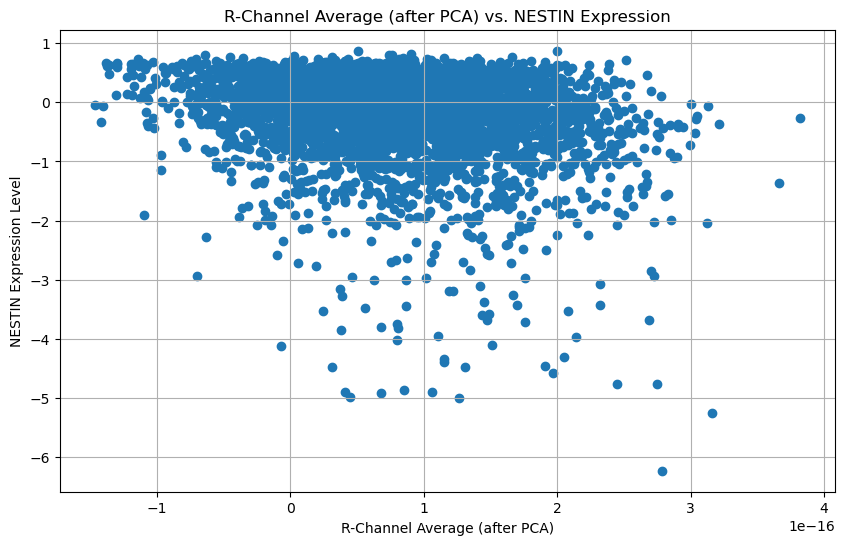

Correlation coefficient: -0.21825386917929154


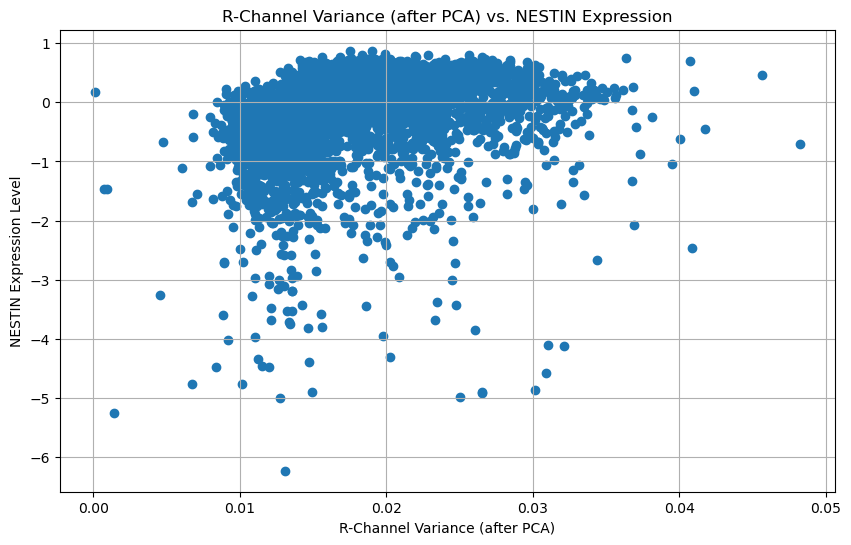

Correlation coefficient: 0.23334143304789864


In [189]:
image_folder = 'train_patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_r_channel_average = []
pca_r_channel_variance = []
nestin_expression_level = []

for idx in train_df.index:
    image_path = image_folder + train_df["specimen_id"][idx] + "_" + train_df['id'][idx] + ".png"
    
    try:
        I = rgba2rgb(imread(image_path))
        I_r = I[:, :, 0]
    except:
        I = imread(image_path)
        I_r = I[:, :, 0]
        
    else:
        pca = PCA(n_components=0.95)  
        I_pca = pca.fit_transform(I_r.reshape(-1, 1))
        I_r_pca = I_pca.reshape(I_r.shape)

        # Calculate H-channel intensity after PCA
        pca_r_channel_average.append(I_r_pca.mean())
        pca_r_channel_variance.append(I_r_pca.var())
        nestin_expression_level.append(train_df['NESTIN'][idx])

plt.figure(figsize=(10, 6))
plt.scatter(pca_r_channel_average, nestin_expression_level)
plt.xlabel('R-Channel Average (after PCA)')
plt.ylabel('NESTIN Expression Level')
plt.title('R-Channel Average (after PCA) vs. NESTIN Expression')
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(pca_r_channel_average, nestin_expression_level)[0, 1]
print('Correlation coefficient:', correlation_coefficient)

plt.figure(figsize=(10, 6))
plt.scatter(pca_r_channel_variance, nestin_expression_level)
plt.xlabel('R-Channel Variance (after PCA)')
plt.ylabel('NESTIN Expression Level')
plt.title('R-Channel Variance (after PCA) vs. NESTIN Expression')
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(pca_r_channel_variance, nestin_expression_level)[0, 1]
print('Correlation coefficient:', correlation_coefficient)

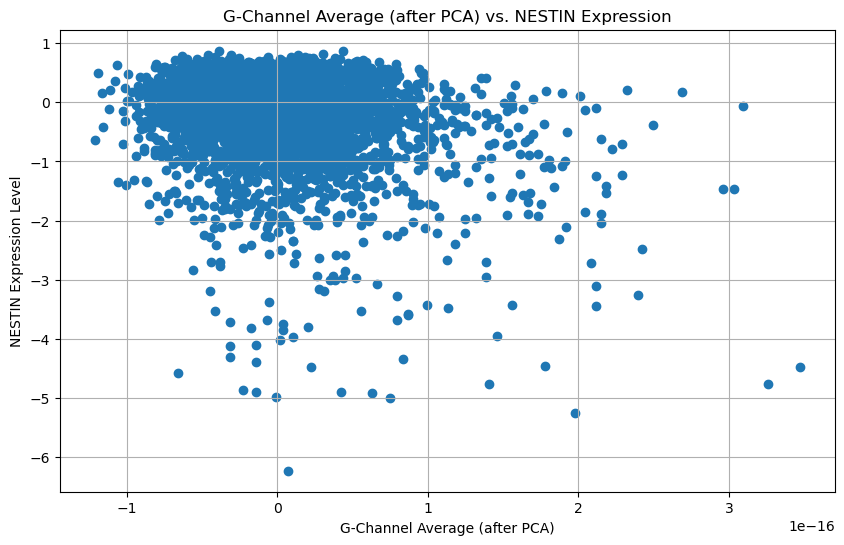

Correlation coefficient: -0.18702559086057308


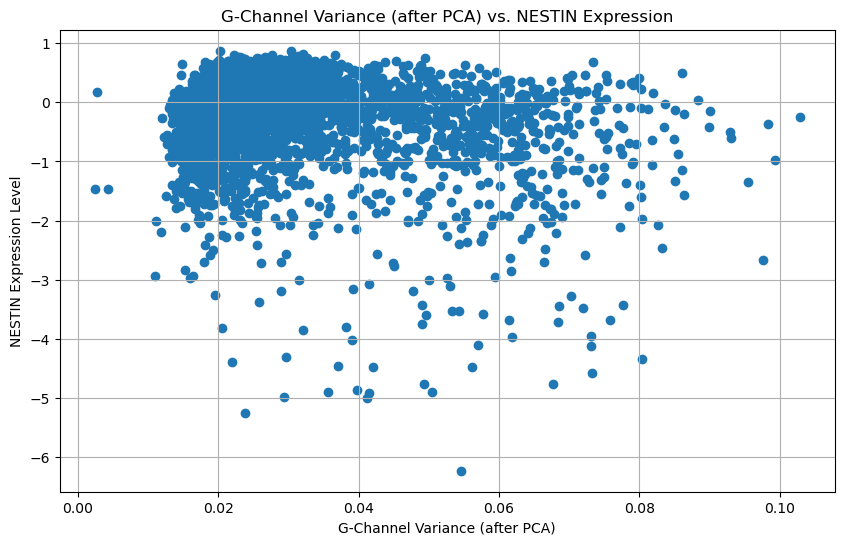

Correlation coefficient: -0.20793899458659845


In [191]:
image_folder = 'train_patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_g_channel_average = []
pca_g_channel_variance = []
nestin_expression_level = []

for idx in train_df.index:
    image_path = image_folder + train_df["specimen_id"][idx] + "_" + train_df['id'][idx] + ".png"
    
    try:
        I = rgba2rgb(imread(image_path))
        I_g = I[:, :, 1]
    except:
        I = imread(image_path)
        I_g = I[:, :, 1]
        
    else:
        pca = PCA(n_components=0.95)  
        I_pca = pca.fit_transform(I_g.reshape(-1, 1))
        I_g_pca = I_pca.reshape(I_g.shape)

        # Calculate H-channel intensity after PCA
        pca_g_channel_average.append(I_g_pca.mean())
        pca_g_channel_variance.append(I_g_pca.var())
        nestin_expression_level.append(train_df['NESTIN'][idx])

plt.figure(figsize=(10, 6))
plt.scatter(pca_g_channel_average, nestin_expression_level)
plt.xlabel('G-Channel Average (after PCA)')
plt.ylabel('NESTIN Expression Level')
plt.title('G-Channel Average (after PCA) vs. NESTIN Expression')
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(pca_g_channel_average, nestin_expression_level)[0, 1]
print('Correlation coefficient:', correlation_coefficient)

plt.figure(figsize=(10, 6))
plt.scatter(pca_g_channel_variance, nestin_expression_level)
plt.xlabel('G-Channel Variance (after PCA)')
plt.ylabel('NESTIN Expression Level')
plt.title('G-Channel Variance (after PCA) vs. NESTIN Expression')
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(pca_g_channel_variance, nestin_expression_level)[0, 1]
print('Correlation coefficient:', correlation_coefficient)

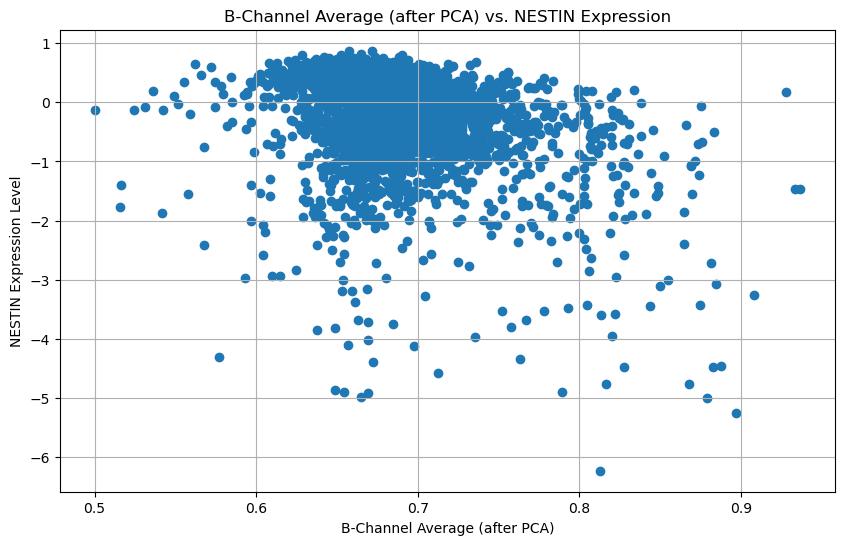

Correlation coefficient: -0.18702559086057308


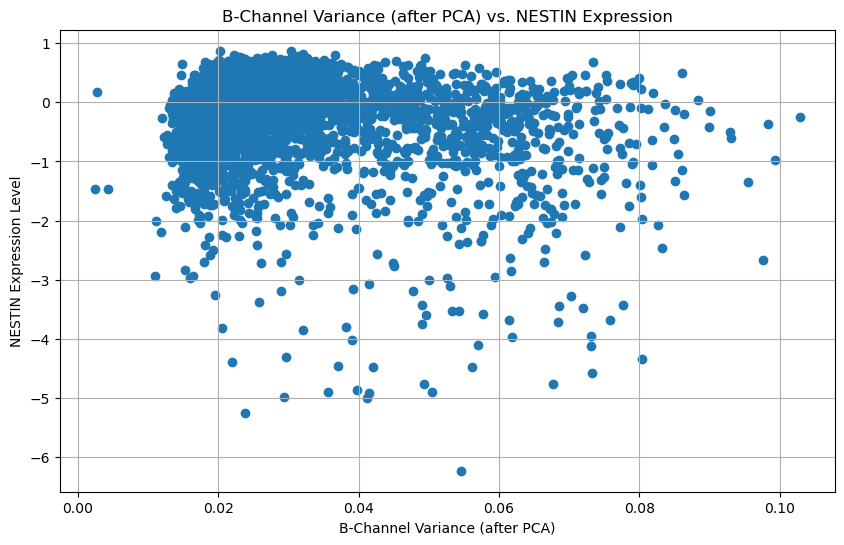

Correlation coefficient: -0.20793899458659845


In [192]:
image_folder = 'train_patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_b_channel_average = []
pca_b_channel_variance = []
nestin_expression_level = []

for idx in train_df.index:
    image_path = image_folder + train_df["specimen_id"][idx] + "_" + train_df['id'][idx] + ".png"
    
    try:
        I = rgba2rgb(imread(image_path))
        I_b = I[:, :, 1]
    except:
        I = imread(image_path)
        I_b = I[:, :, 1]
        
    else:
        pca = PCA(n_components=0.95)  
        I_pca = pca.fit_transform(I_b.reshape(-1, 1))
        I_b_pca = I_pca.reshape(I_b.shape)

        # Calculate H-channel intensity after PCA
        pca_b_channel_average.append(I_b_pca.mean())
        pca_b_channel_variance.append(I_b_pca.var())
        nestin_expression_level.append(train_df['NESTIN'][idx])

plt.figure(figsize=(10, 6))
plt.scatter(b_channel_average, nestin_expression_level)
plt.xlabel('B-Channel Average (after PCA)')
plt.ylabel('NESTIN Expression Level')
plt.title('B-Channel Average (after PCA) vs. NESTIN Expression')
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(pca_b_channel_average, nestin_expression_level)[0, 1]
print('Correlation coefficient:', correlation_coefficient)

plt.figure(figsize=(10, 6))
plt.scatter(pca_b_channel_variance, nestin_expression_level)
plt.xlabel('B-Channel Variance (after PCA)')
plt.ylabel('NESTIN Expression Level')
plt.title('B-Channel Variance (after PCA) vs. NESTIN Expression')
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(pca_b_channel_variance, nestin_expression_level)[0, 1]
print('Correlation coefficient:', correlation_coefficient)

## 2-b) Using GLCM  

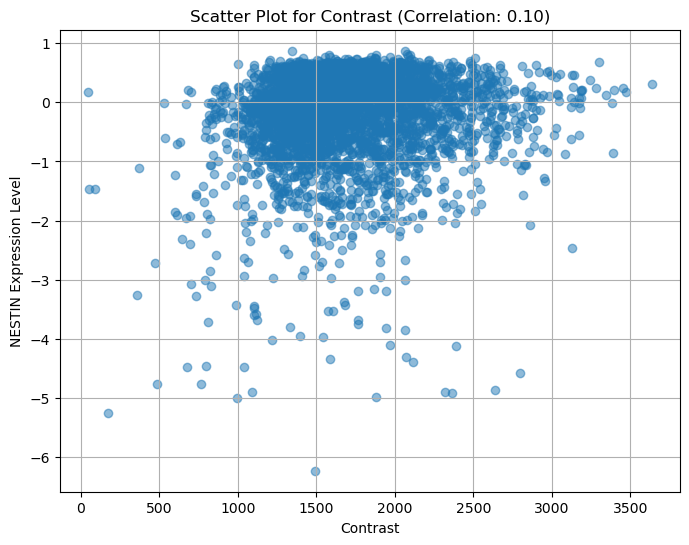

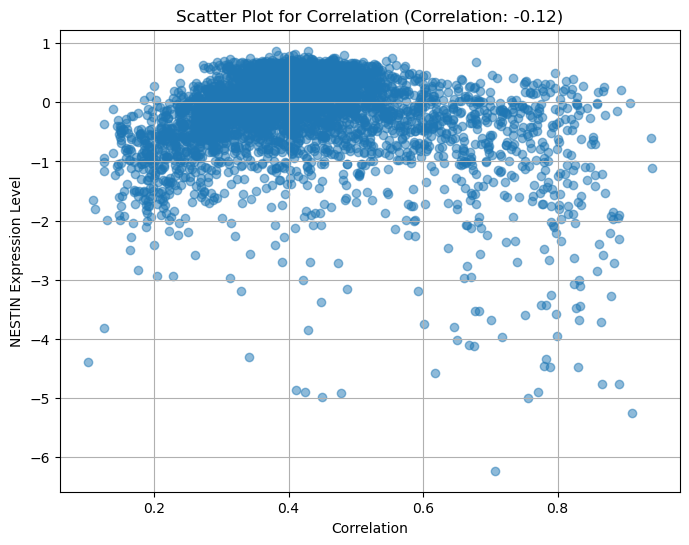

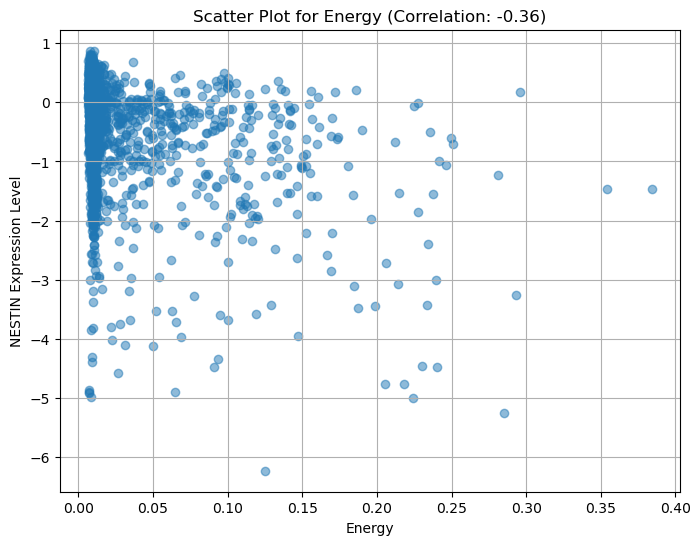

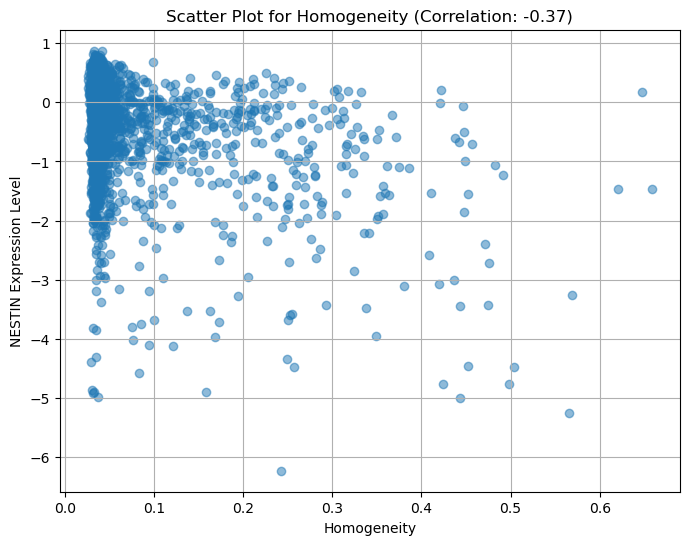

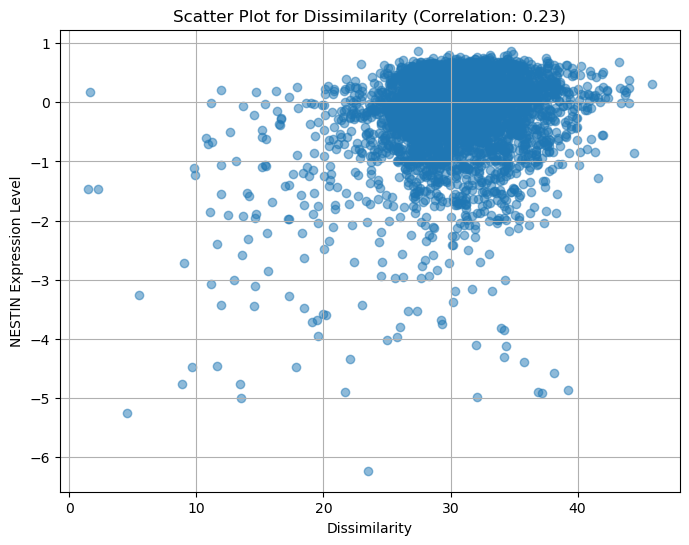

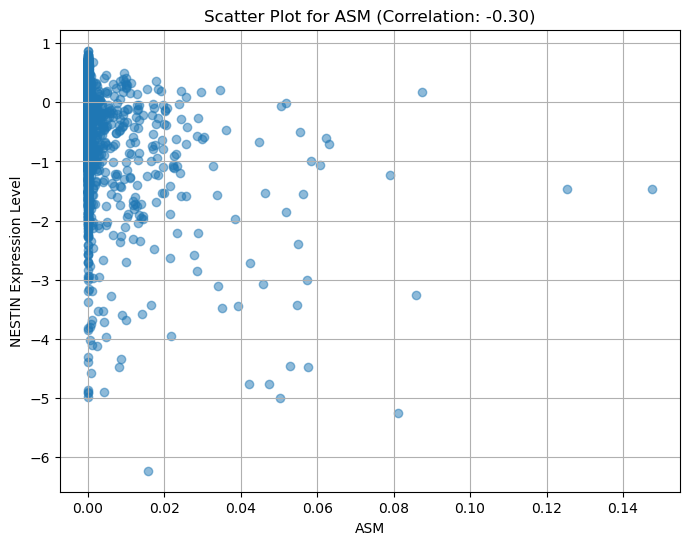

In [25]:
image_folder = 'train_patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray

# Function to calculate GLCM features for an image
def calculate_glcm_features(image):
    # Convert image to grayscale
    gray_image = rgb2gray(image)
    # Calculate GLCM
    glcm = graycomatrix((gray_image * 255).astype(np.uint8), distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    # Calculate GLCM properties (contrast, correlation, energy, homogeneity)
    contrast = graycoprops(glcm, prop='contrast').ravel()[0]
    correlation = graycoprops(glcm, prop='correlation').ravel()[0]
    energy = graycoprops(glcm, prop='energy').ravel()[0]
    homogeneity = graycoprops(glcm, prop='homogeneity').ravel()[0]
    dissimilarity = graycoprops(glcm, prop='dissimilarity').ravel()[0]
    asm = graycoprops(glcm, prop='ASM').ravel()[0]
    return contrast, correlation, energy, homogeneity,dissimilarity,asm

# Initialize lists to store GLCM features and target variable
glcm_contrast = []
glcm_correlation = []
glcm_energy = []
glcm_homogeneity = []
glcm_dissimilarity = []
glcm_asm = []
nestin_expression_level = []

# Iterate through images
for idx in train_df.index:
    image_path = image_folder + train_df["specimen_id"][idx] + "_" + train_df['id'][idx] + ".png"
    try:
        I = rgba2rgb(imread(image_path))
        
    except:
        I = imread(image_path)
        
    else:
        # Calculate GLCM features
        contrast, correlation, energy, homogeneity, dissimilarity, asm = calculate_glcm_features(I)
        # Append GLCM features to lists
        glcm_contrast.append(contrast)
        glcm_correlation.append(correlation)
        glcm_energy.append(energy)
        glcm_homogeneity.append(homogeneity)
        glcm_dissimilarity.append(dissimilarity)
        glcm_asm.append(asm)
        # Append NESTIN expression level to list
        nestin_expression_level.append(train_df['NESTIN'][idx])

# Convert lists to numpy arrays
glcm_contrast = np.array(glcm_contrast)
glcm_correlation = np.array(glcm_correlation)
glcm_energy = np.array(glcm_energy)
glcm_homogeneity = np.array(glcm_homogeneity)
glcm_dissimilarity = np.array(glcm_dissimilarity)
glcm_asm = np.array(glcm_asm)
nestin_expression_level = np.array(nestin_expression_level)

# Plot scatter plots and calculate correlation coefficients for each GLCM feature
glcm_features = {'Contrast': glcm_contrast, 'Correlation': glcm_correlation, 'Energy': glcm_energy, 'Homogeneity': glcm_homogeneity, 'Dissimilarity': glcm_dissimilarity, 'ASM': glcm_asm}

for feature_name, feature_values in glcm_features.items():
    correlation_coefficient = np.corrcoef(feature_values, nestin_expression_level)[0, 1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(feature_values, nestin_expression_level, alpha=0.5)
    plt.xlabel(feature_name)
    plt.ylabel('NESTIN Expression Level')
    plt.title(f'Scatter Plot for {feature_name} (Correlation: {correlation_coefficient:.2f})')
    plt.grid(True)
    plt.show()


## 2-c)Transfer Learning 

Using efficientnet-b4 as a pretrained model 

In [73]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import skimage.color as color
from skimage.io import imread
import numpy as np


def load_and_preprocess_image(image_path):
    try:
        I = rgba2rgb(imread(image_path))
        
    except:
        I = imread(image_path)
    
    else:
        # Preprocess the image
      transform = transforms.Compose([
          transforms.ToPILImage(),
          transforms.Resize((224, 224)),  # Adjust size if needed for different EfficientNet models
          transforms.ToTensor(),
          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
          ])
      return transform(I).unsqueeze(0)  # Add batch dimension

  
def extract_features(efficientnet_model, image):
  """Extracts features from an image using the EfficientNet model."""
  if image is None:
    return None
  
  # Extract features with no gradient calculation
  with torch.no_grad():
    features = efficientnet_model(image)
  
  # Return the features (assuming output from the final layer)
  return features.cpu().detach().numpy().squeeze()  # Remove batch dimension


# Define paths and initialize variables
image_folder = 'train_patches_256/'
efficientnet_model = models.efficientnet_b4(pretrained=True)  # Adjust model name if needed
efficientnet_model.eval()

efficientnet_features = []
nestin_expression_level = []

# Loop through image paths and extract features
for idx in train_df.index:
  image_path = image_folder + train_df["specimen_id"][idx] + "_" + train_df['id'][idx] + ".png"
  preprocessed_image = load_and_preprocess_image(image_path)
  features = extract_features(efficientnet_model, preprocessed_image)
  
  if features is not None:
    efficientnet_features.append(features)
    nestin_expression_level.append(train_df['NESTIN'][idx])



C:\Users\VatsaL\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B4_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-23ab8bcd.pth" to C:\Users\VatsaL/.cache\torch\hub\checkpoints\efficientnet_b4_rwightman-23ab8bcd.pth
100%|██████████| 74.5M/74.5M [00:02<00:00, 27.3MB/s]


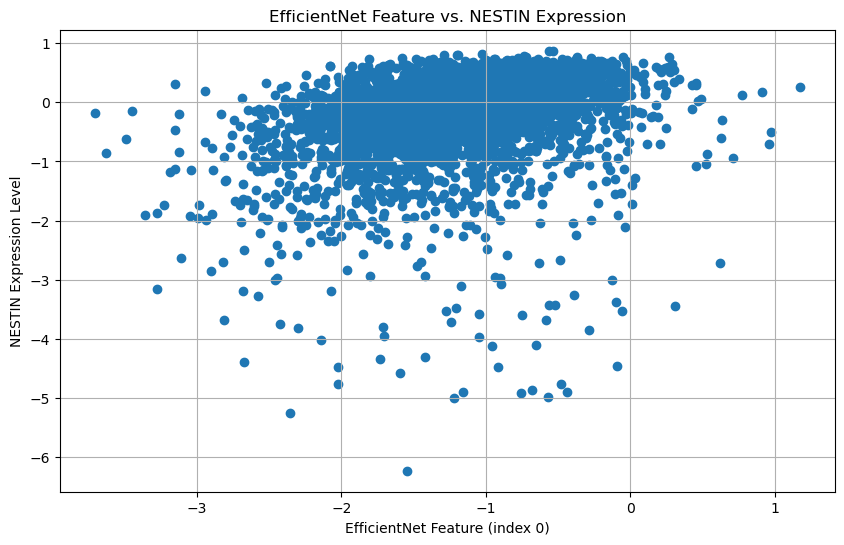

Correlation coefficient: 0.32925242102806956


In [74]:
# Choose the feature index (adjust based on your model's output)
chosen_feature_index = 0  # Example: Assuming the first feature

# Filter lists to ensure matching lengths (using list comprehension)
filtered_efficientnet_features = [f[chosen_feature_index] for f in efficientnet_features if f is not None]
filtered_nestin_level = [nel for nel, f in zip(nestin_expression_level, efficientnet_features) if f is not None]

# Ensure lists have the same length (if necessary)
if len(filtered_efficientnet_features) != len(filtered_nestin_level):
    # Handle the case where list lengths differ (e.g., shorten the longer list)
    filtered_efficientnet_features = filtered_efficientnet_features[:len(filtered_nestin_level)]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_efficientnet_features, filtered_nestin_level)
plt.xlabel('EfficientNet Feature (index {})'.format(chosen_feature_index))
plt.ylabel('NESTIN Expression Level')
plt.title('EfficientNet Feature vs. NESTIN Expression')
plt.grid(True)
plt.show()
correlation_coefficient = np.corrcoef(filtered_efficientnet_features, filtered_nestin_level)[0, 1]
print('Correlation coefficient:', correlation_coefficient)

Now if we follow from steps a to c and also considering no pca, no glcm, no Transfer learning data when we see the correlation coefficient we found out that efficientnet-b4 is performing better here its coefficient is 0.329

## Applying the following regression models using the features:
Ordinary Least Squares (OLS) Regression or Multi-layer Perceptron (MLP) (your choice!)
Support Vector Regression (SVR)


## Applying Regression models with GLCM

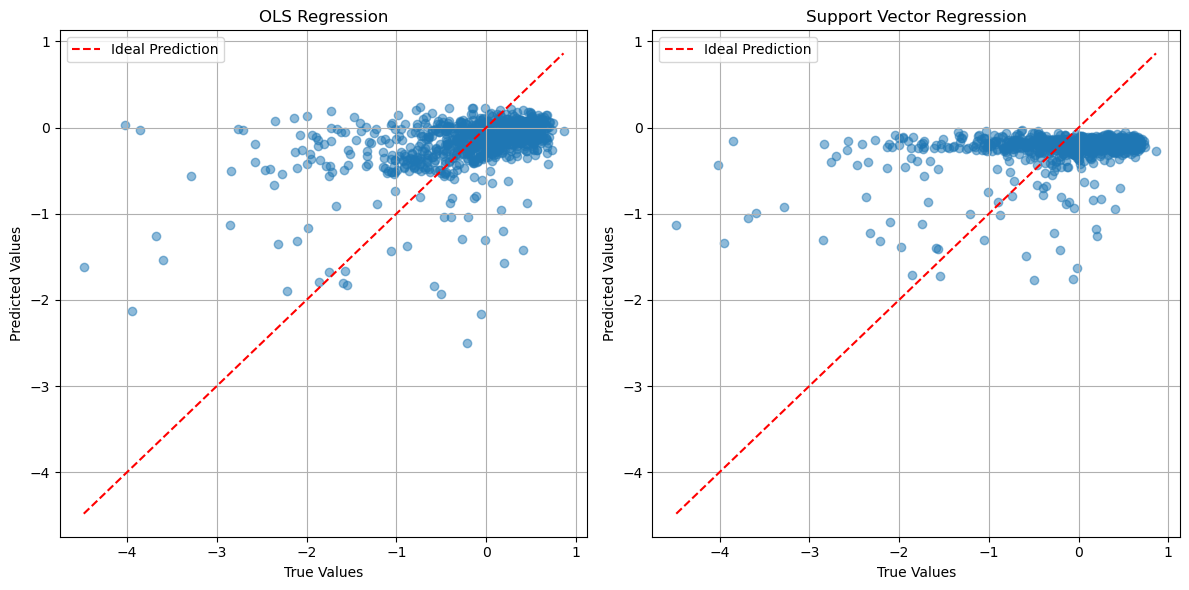

Performance Metrics:
OLS Regression:
RMSE: 0.6786325355397929
Pearson Correlation Coefficient: 0.422185759371552
Spearman Correlation Coefficient: 0.41776469774115876
R2 Score: 0.1775078778316065

Support Vector Regression:
RMSE: 0.7098444489024573
Pearson Correlation Coefficient: 0.3221670622657796
Spearman Correlation Coefficient: 0.1300063135469281
R2 Score: 0.10011135125298831


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
# Prepare feature matrix and target variable
X = np.column_stack((glcm_contrast, glcm_correlation, glcm_energy, glcm_homogeneity, glcm_dissimilarity, glcm_asm))
y = nestin_expression_level

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regression models
ols_model = LinearRegression()
svr_model = SVR(kernel='linear')  # You may choose different kernels and hyperparameters

# Train the models
ols_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Predict on the test set
ols_pred = ols_model.predict(X_test)
svr_pred = svr_model.predict(X_test)

# Calculate performance metrics
ols_rmse = np.sqrt(mean_squared_error(y_test, ols_pred))
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))

ols_pearson_corr, _ = pearsonr(y_test, ols_pred)
svr_pearson_corr, _ = pearsonr(y_test, svr_pred)

ols_spearman_corr, _ = spearmanr(y_test, ols_pred)
svr_spearman_corr, _ = spearmanr(y_test, svr_pred)

ols_r2_score = r2_score(y_test, ols_pred)
svr_r2_score = r2_score(y_test, svr_pred)

# Visualize scatter plots for true vs. predicted values
plt.figure(figsize=(12, 6))

# OLS Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, ols_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('OLS Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# SVR
plt.subplot(1, 2, 2)
plt.scatter(y_test, svr_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('Support Vector Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print performance metrics
print("Performance Metrics:")
print("OLS Regression:")
print("RMSE:", ols_rmse)
print("Pearson Correlation Coefficient:", ols_pearson_corr)
print("Spearman Correlation Coefficient:", ols_spearman_corr)
print("R2 Score:", ols_r2_score)

print("\nSupport Vector Regression:")
print("RMSE:", svr_rmse)
print("Pearson Correlation Coefficient:", svr_pearson_corr)
print("Spearman Correlation Coefficient:", svr_spearman_corr)
print("R2 Score:", svr_r2_score)


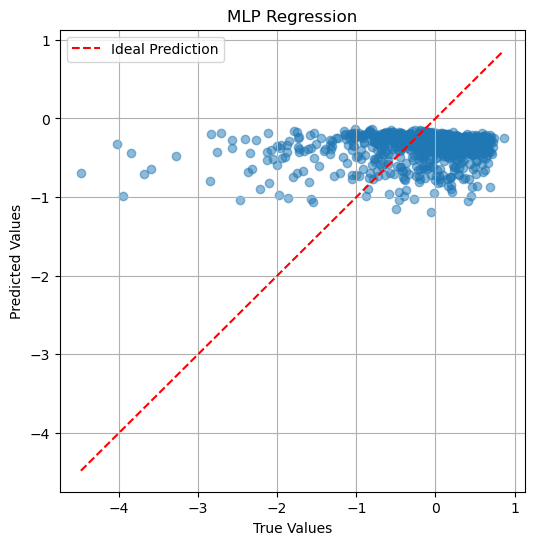


MLP Regression:
RMSE: 0.7587839838890467
Pearson Correlation Coefficient: 0.16067170899593058
Spearman Correlation Coefficient: -0.012096741355361155
R2 Score: -0.028249965396617727


In [29]:
from sklearn.neural_network import MLPRegressor

# Initialize MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the MLP model
mlp_model.fit(X_train, y_train)

# Predict on the test set
mlp_pred = mlp_model.predict(X_test)

# Calculate performance metrics for MLP
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))
mlp_pearson_corr, _ = pearsonr(y_test, mlp_pred)
mlp_spearman_corr, _ = spearmanr(y_test, mlp_pred)
mlp_r2_score = r2_score(y_test, mlp_pred)

# Visualize scatter plot for MLP
plt.figure(figsize=(6, 6))
plt.scatter(y_test, mlp_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('MLP Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Print performance metrics for MLP
print("\nMLP Regression:")
print("RMSE:", mlp_rmse)
print("Pearson Correlation Coefficient:", mlp_pearson_corr)
print("Spearman Correlation Coefficient:", mlp_spearman_corr)
print("R2 Score:", mlp_r2_score)

## Applying Regression models with PCA taking h average

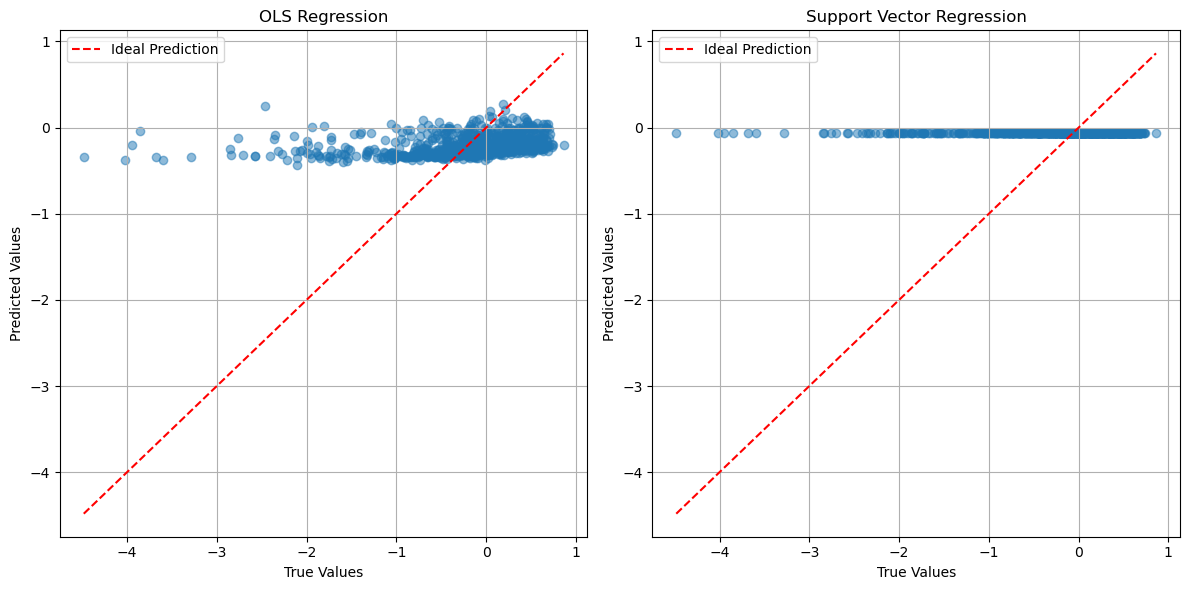

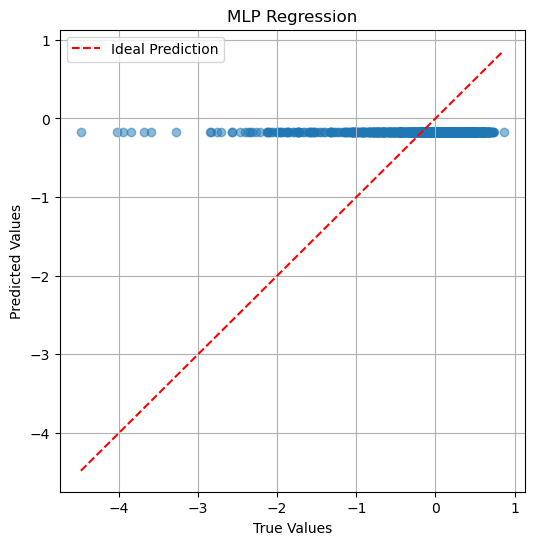

Performance Metrics:
OLS Regression:
RMSE: 0.7212108130372186
Pearson Correlation Coefficient: 0.31111402866926163
Spearman Correlation Coefficient: 0.43885001997978046
R2 Score: 0.07106173747383737

Support Vector Regression:
RMSE: 0.7632031396519592
Pearson Correlation Coefficient: 0.31111402866925997
Spearman Correlation Coefficient: 0.43885001997978046
R2 Score: -0.04026189229322985

MLP Regression:
RMSE: 0.749450824556708
Pearson Correlation Coefficient: 0.31111402866925286
Spearman Correlation Coefficient: 0.43885001997978046
R2 Score: -0.003110268777551717


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
# Prepare feature matrix and target variable
X = np.array(pca_h_channel_variance).reshape(-1, 1)
y = np.array(nestin_expression_level)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regression models
ols_model = LinearRegression()
svr_model = SVR(kernel='linear')  # You may choose different kernels and hyperparameters
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the models
ols_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Predict on the test set
ols_pred = ols_model.predict(X_test)
svr_pred = svr_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

# Calculate performance metrics
ols_rmse = np.sqrt(mean_squared_error(y_test, ols_pred))
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))

ols_pearson_corr, _ = pearsonr(y_test, ols_pred)
svr_pearson_corr, _ = pearsonr(y_test, svr_pred)
mlp_pearson_corr, _ = pearsonr(y_test, mlp_pred)

ols_spearman_corr, _ = spearmanr(y_test, ols_pred)
svr_spearman_corr, _ = spearmanr(y_test, svr_pred)
mlp_spearman_corr, _ = spearmanr(y_test, mlp_pred)

ols_r2_score = r2_score(y_test, ols_pred)
svr_r2_score = r2_score(y_test, svr_pred)
mlp_r2_score = r2_score(y_test, mlp_pred)

# Visualize scatter plots for true vs. predicted values
plt.figure(figsize=(12, 6))

# OLS Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, ols_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('OLS Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# SVR
plt.subplot(1, 2, 2)
plt.scatter(y_test, svr_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('Support Vector Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# MLP
plt.figure(figsize=(6, 6))
plt.scatter(y_test, mlp_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('MLP Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



# Print performance metrics
print("Performance Metrics:")
print("OLS Regression:")
print("RMSE:", ols_rmse)
print("Pearson Correlation Coefficient:", ols_pearson_corr)
print("Spearman Correlation Coefficient:", ols_spearman_corr)
print("R2 Score:", ols_r2_score)

print("\nSupport Vector Regression:")
print("RMSE:", svr_rmse)
print("Pearson Correlation Coefficient:", svr_pearson_corr)
print("Spearman Correlation Coefficient:", svr_spearman_corr)
print("R2 Score:", svr_r2_score)

print("\nMLP Regression:")
print("RMSE:", mlp_rmse)
print("Pearson Correlation Coefficient:", mlp_pearson_corr)
print("Spearman Correlation Coefficient:", mlp_spearman_corr)
print("R2 Score:", mlp_r2_score)


## Applying Regression model with PCA taking h variance

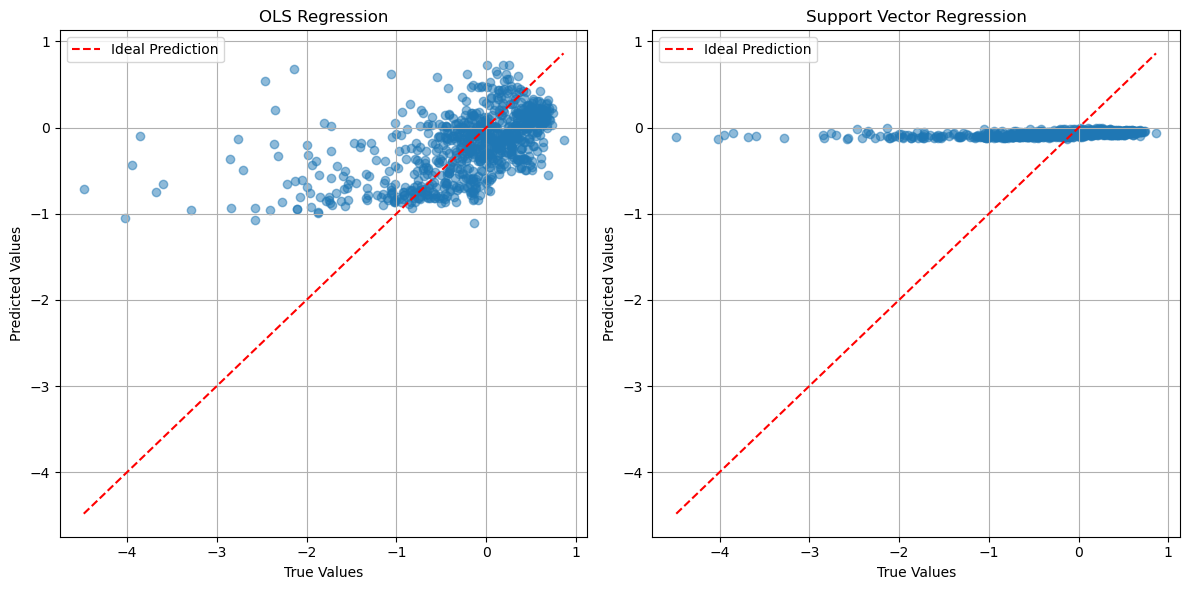

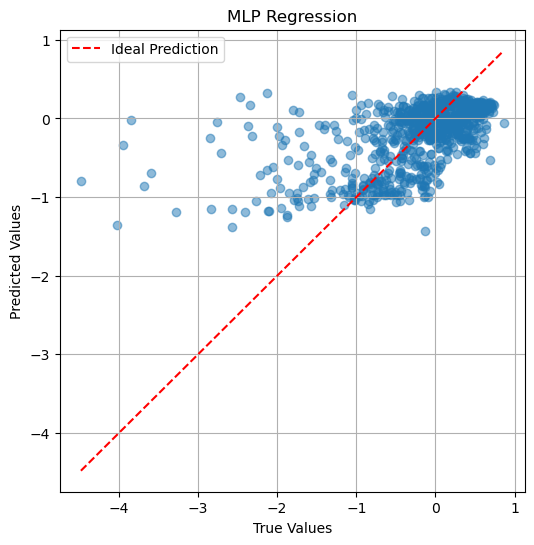

Performance Metrics:
OLS Regression:
RMSE: 0.6348813204016347
Pearson Correlation Coefficient: 0.5302289580918533
Spearman Correlation Coefficient: 0.5940783324774688
R2 Score: 0.2801409125822991

Support Vector Regression:
RMSE: 0.7483394691269647
Pearson Correlation Coefficient: 0.5302289580918533
Spearman Correlation Coefficient: 0.5940783324774688
R2 Score: -0.0001374640682574313

MLP Regression:
RMSE: 0.61452493994674
Pearson Correlation Coefficient: 0.5723261733223146
Spearman Correlation Coefficient: 0.5940783324774688
R2 Score: 0.32556295197532403


In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
# Prepare feature matrix and target variable
X = np.array(h_channel_average).reshape(-1, 1)
y = np.array(nestin_expression_level)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regression models
ols_model = LinearRegression()
svr_model = SVR(kernel='linear')  # You may choose different kernels and hyperparameters
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the models
ols_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Predict on the test set
ols_pred = ols_model.predict(X_test)
svr_pred = svr_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

# Calculate performance metrics
ols_rmse = np.sqrt(mean_squared_error(y_test, ols_pred))
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))

ols_pearson_corr, _ = pearsonr(y_test, ols_pred)
svr_pearson_corr, _ = pearsonr(y_test, svr_pred)
mlp_pearson_corr, _ = pearsonr(y_test, mlp_pred)

ols_spearman_corr, _ = spearmanr(y_test, ols_pred)
svr_spearman_corr, _ = spearmanr(y_test, svr_pred)
mlp_spearman_corr, _ = spearmanr(y_test, mlp_pred)

ols_r2_score = r2_score(y_test, ols_pred)
svr_r2_score = r2_score(y_test, svr_pred)
mlp_r2_score = r2_score(y_test, mlp_pred)

# Visualize scatter plots for true vs. predicted values
plt.figure(figsize=(12, 6))

# OLS Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, ols_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('OLS Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# SVR
plt.subplot(1, 2, 2)
plt.scatter(y_test, svr_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('Support Vector Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# MLP
plt.figure(figsize=(6, 6))
plt.scatter(y_test, mlp_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('MLP Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



# Print performance metrics
print("Performance Metrics:")
print("OLS Regression:")
print("RMSE:", ols_rmse)
print("Pearson Correlation Coefficient:", ols_pearson_corr)
print("Spearman Correlation Coefficient:", ols_spearman_corr)
print("R2 Score:", ols_r2_score)

print("\nSupport Vector Regression:")
print("RMSE:", svr_rmse)
print("Pearson Correlation Coefficient:", svr_pearson_corr)
print("Spearman Correlation Coefficient:", svr_spearman_corr)
print("R2 Score:", svr_r2_score)

print("\nMLP Regression:")
print("RMSE:", mlp_rmse)
print("Pearson Correlation Coefficient:", mlp_pearson_corr)
print("Spearman Correlation Coefficient:", mlp_spearman_corr)
print("R2 Score:", mlp_r2_score)


## Applying Regression with our Transfer learning model

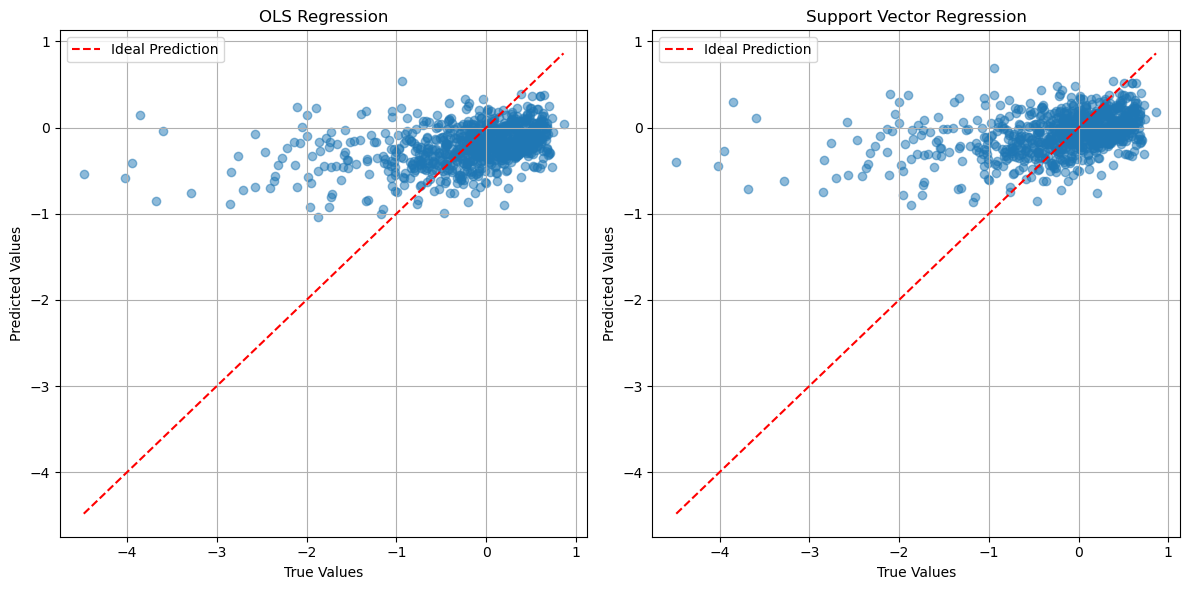

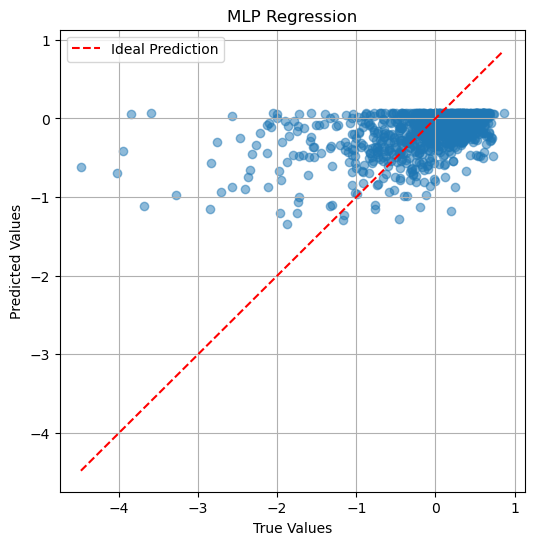

Performance Metrics:
OLS Regression:
RMSE: 0.6946516319795967
Pearson Correlation Coefficient: 0.37629552120710646
Spearman Correlation Coefficient: 0.3984453214852
R2 Score: 0.13821979634491988

Support Vector Regression:
RMSE: 0.7094059920155885
Pearson Correlation Coefficient: 0.3762955175217503
Spearman Correlation Coefficient: 0.3984453214852
R2 Score: 0.10122269478572254

MLP Regression:
RMSE: 0.6821988225002483
Pearson Correlation Coefficient: 0.4135139836733382
Spearman Correlation Coefficient: 0.39891912185782524
R2 Score: 0.16884059464112333


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
# Prepare feature matrix and target variable
X = np.array(filtered_efficientnet_features).reshape(-1, 1)
y = np.array(filtered_nestin_level)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regression models
ols_model = LinearRegression()
svr_model = SVR(kernel='linear')  # You may choose different kernels and hyperparameters
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the models
ols_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Predict on the test set
ols_pred = ols_model.predict(X_test)
svr_pred = svr_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

# Calculate performance metrics
ols_rmse = np.sqrt(mean_squared_error(y_test, ols_pred))
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))

ols_pearson_corr, _ = pearsonr(y_test, ols_pred)
svr_pearson_corr, _ = pearsonr(y_test, svr_pred)
mlp_pearson_corr, _ = pearsonr(y_test, mlp_pred)

ols_spearman_corr, _ = spearmanr(y_test, ols_pred)
svr_spearman_corr, _ = spearmanr(y_test, svr_pred)
mlp_spearman_corr, _ = spearmanr(y_test, mlp_pred)

ols_r2_score = r2_score(y_test, ols_pred)
svr_r2_score = r2_score(y_test, svr_pred)
mlp_r2_score = r2_score(y_test, mlp_pred)

# Visualize scatter plots for true vs. predicted values
plt.figure(figsize=(12, 6))

# OLS Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, ols_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('OLS Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# SVR
plt.subplot(1, 2, 2)
plt.scatter(y_test, svr_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('Support Vector Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# MLP
plt.figure(figsize=(6, 6))
plt.scatter(y_test, mlp_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('MLP Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



# Print performance metrics
print("Performance Metrics:")
print("OLS Regression:")
print("RMSE:", ols_rmse)
print("Pearson Correlation Coefficient:", ols_pearson_corr)
print("Spearman Correlation Coefficient:", ols_spearman_corr)
print("R2 Score:", ols_r2_score)

print("\nSupport Vector Regression:")
print("RMSE:", svr_rmse)
print("Pearson Correlation Coefficient:", svr_pearson_corr)
print("Spearman Correlation Coefficient:", svr_spearman_corr)
print("R2 Score:", svr_r2_score)

print("\nMLP Regression:")
print("RMSE:", mlp_rmse)
print("Pearson Correlation Coefficient:", mlp_pearson_corr)
print("Spearman Correlation Coefficient:", mlp_spearman_corr)
print("R2 Score:", mlp_r2_score)


The model that stands out with respect to considerations to the metrics is *MLP-PCA-Using H_variance*. 
- It has relatively low RMSE and R2 score is positive and one of the highest as well. 
- The Pearson and Spearman Correlation Coefficient are relatively high, which shows a good prediction capability between the models predictions and the actual values.

# Using Convolutional Neural Networks (CNN)

## Develop a Convolutional Neural Network (CNN) using PyTorch to predict the expression level of NESTIN from input images,


In [197]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from skimage.io import imread
from skimage.color import rgba2rgb
from PIL import Image
import pandas as pd

cnn_image_folder = 'patches_256/'
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x
   
    




In [198]:
# Define custom dataset class
class CustomDataset(Dataset):
    def __init__(self, df, image_folder, transform=None):
        self.df = df
        self.image_folder = image_folder
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        try:
            specimen_id = self.df["specimen_id"][idx]
            id_val = self.df['id'][idx]
        except KeyError as e:
            print(f"KeyError: {e}")
            return None

        image_path = self.image_folder + specimen_id + "_" + id_val + ".png"
        try:
            image = Image.open(image_path).convert('RGB')
        except:
            print(f"Error reading image: {image_path}")
            return None

        if self.transform:
            image = self.transform(image)

        label = self.df['NESTIN'][idx]

        return image, label

In [199]:
# Load the dataset
train_dataset = CustomDataset(train_df, cnn_image_folder, transform=transform)
test_dataset = CustomDataset(test_df, cnn_image_folder, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [200]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [201]:
simpleCNN_model = CustomCNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(simpleCNN_model.parameters(), lr=0.001)

In [137]:
num_epochs = 10

for epoch in range(num_epochs):
    simpleCNN_model.train()

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = simpleCNN_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.24783855676651
Epoch 2, Loss: 0.3521357476711273
Epoch 3, Loss: 0.18396200239658356
Epoch 4, Loss: 0.5875437259674072
Epoch 5, Loss: 0.10123048722743988
Epoch 6, Loss: 0.06633897125720978
Epoch 7, Loss: 0.07193657010793686
Epoch 8, Loss: 0.03286769613623619
Epoch 9, Loss: 0.022154729813337326
Epoch 10, Loss: 0.030776266008615494


RMSE: 0.693709
Pearson Correlation Coefficient: 0.5293028989763935
Spearman Correlation Coefficient: 0.5715053557667791
R2 score: -0.0986068448350006


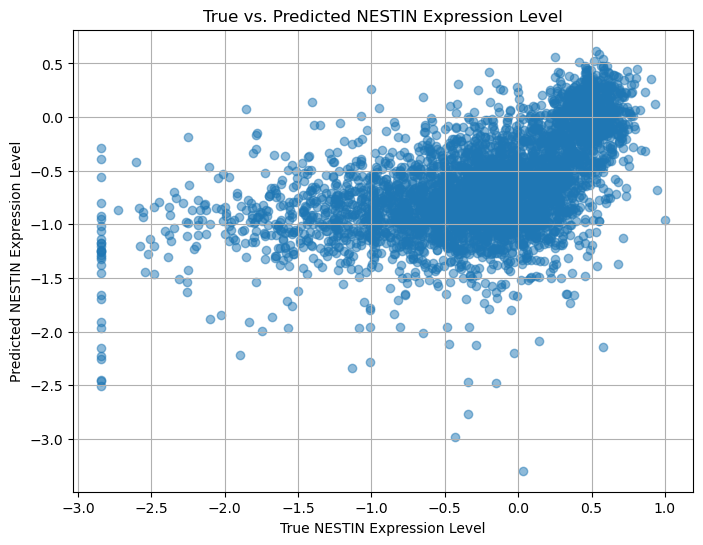

In [138]:
# Make predictions on the test dataset
simpleCNN_model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.float().to(device).unsqueeze(1)
        outputs = simpleCNN_model(images)
        predictions.extend(outputs.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

predictions = np.array(predictions).flatten()
true_labels = np.array(true_labels).flatten()

# Compute RMSE
rmse = np.sqrt(mean_squared_error(true_labels, predictions))

# Calculate Pearson Correlation Coefficient
pearson_corr, _ = pearsonr(true_labels, predictions)

# Calculate Spearman Correlation Coefficient
spearman_corr, _ = spearmanr(true_labels, predictions)

# Compute R2 score
r2 = r2_score(true_labels, predictions)

# Print the metrics
print("RMSE:", rmse)
print("Pearson Correlation Coefficient:", pearson_corr)
print("Spearman Correlation Coefficient:", spearman_corr)
print("R2 score:", r2)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(true_labels, predictions, alpha=0.5)
plt.xlabel('True NESTIN Expression Level')
plt.ylabel('Predicted NESTIN Expression Level')
plt.title('True vs. Predicted NESTIN Expression Level')
plt.grid(True)
plt.show()

## Create a neural network using PyTorch to simultaneously predict the expression levels of five specific proteins (EGFR, PTEN, NESTIN, SOX2, and MET) from given image patches.

Using device: cpu
Specimen 1, Epoch 1, Train Loss: 0.1368
Specimen 1, Epoch 2, Train Loss: 15.9261
Specimen 1, Epoch 3, Train Loss: 0.2268
Specimen 1, Epoch 4, Train Loss: 0.7034
Specimen 1, Epoch 5, Train Loss: 0.4587
Specimen 2, Epoch 1, Train Loss: 0.2359
Specimen 2, Epoch 2, Train Loss: 0.1102
Specimen 2, Epoch 3, Train Loss: 0.0659
Specimen 2, Epoch 4, Train Loss: 0.0683
Specimen 2, Epoch 5, Train Loss: 0.0614
Specimen 3, Epoch 1, Train Loss: 0.1387
Specimen 3, Epoch 2, Train Loss: 0.1051
Specimen 3, Epoch 3, Train Loss: 0.0708
Specimen 3, Epoch 4, Train Loss: 0.0484
Specimen 3, Epoch 5, Train Loss: 0.0399
Specimen 4, Epoch 1, Train Loss: 0.0469
Specimen 4, Epoch 2, Train Loss: 0.0568
Specimen 4, Epoch 3, Train Loss: 0.0555
Specimen 4, Epoch 4, Train Loss: 0.0474
Specimen 4, Epoch 5, Train Loss: 0.0367

Metrics for EGFR:
Average: {'RMSE': 0.4607901, 'Pearson Correlation': -0.20794293722935767, 'Spearman Correlation': -0.25580028833942636, 'R2 Score': -6.46341205552671}
Standard De

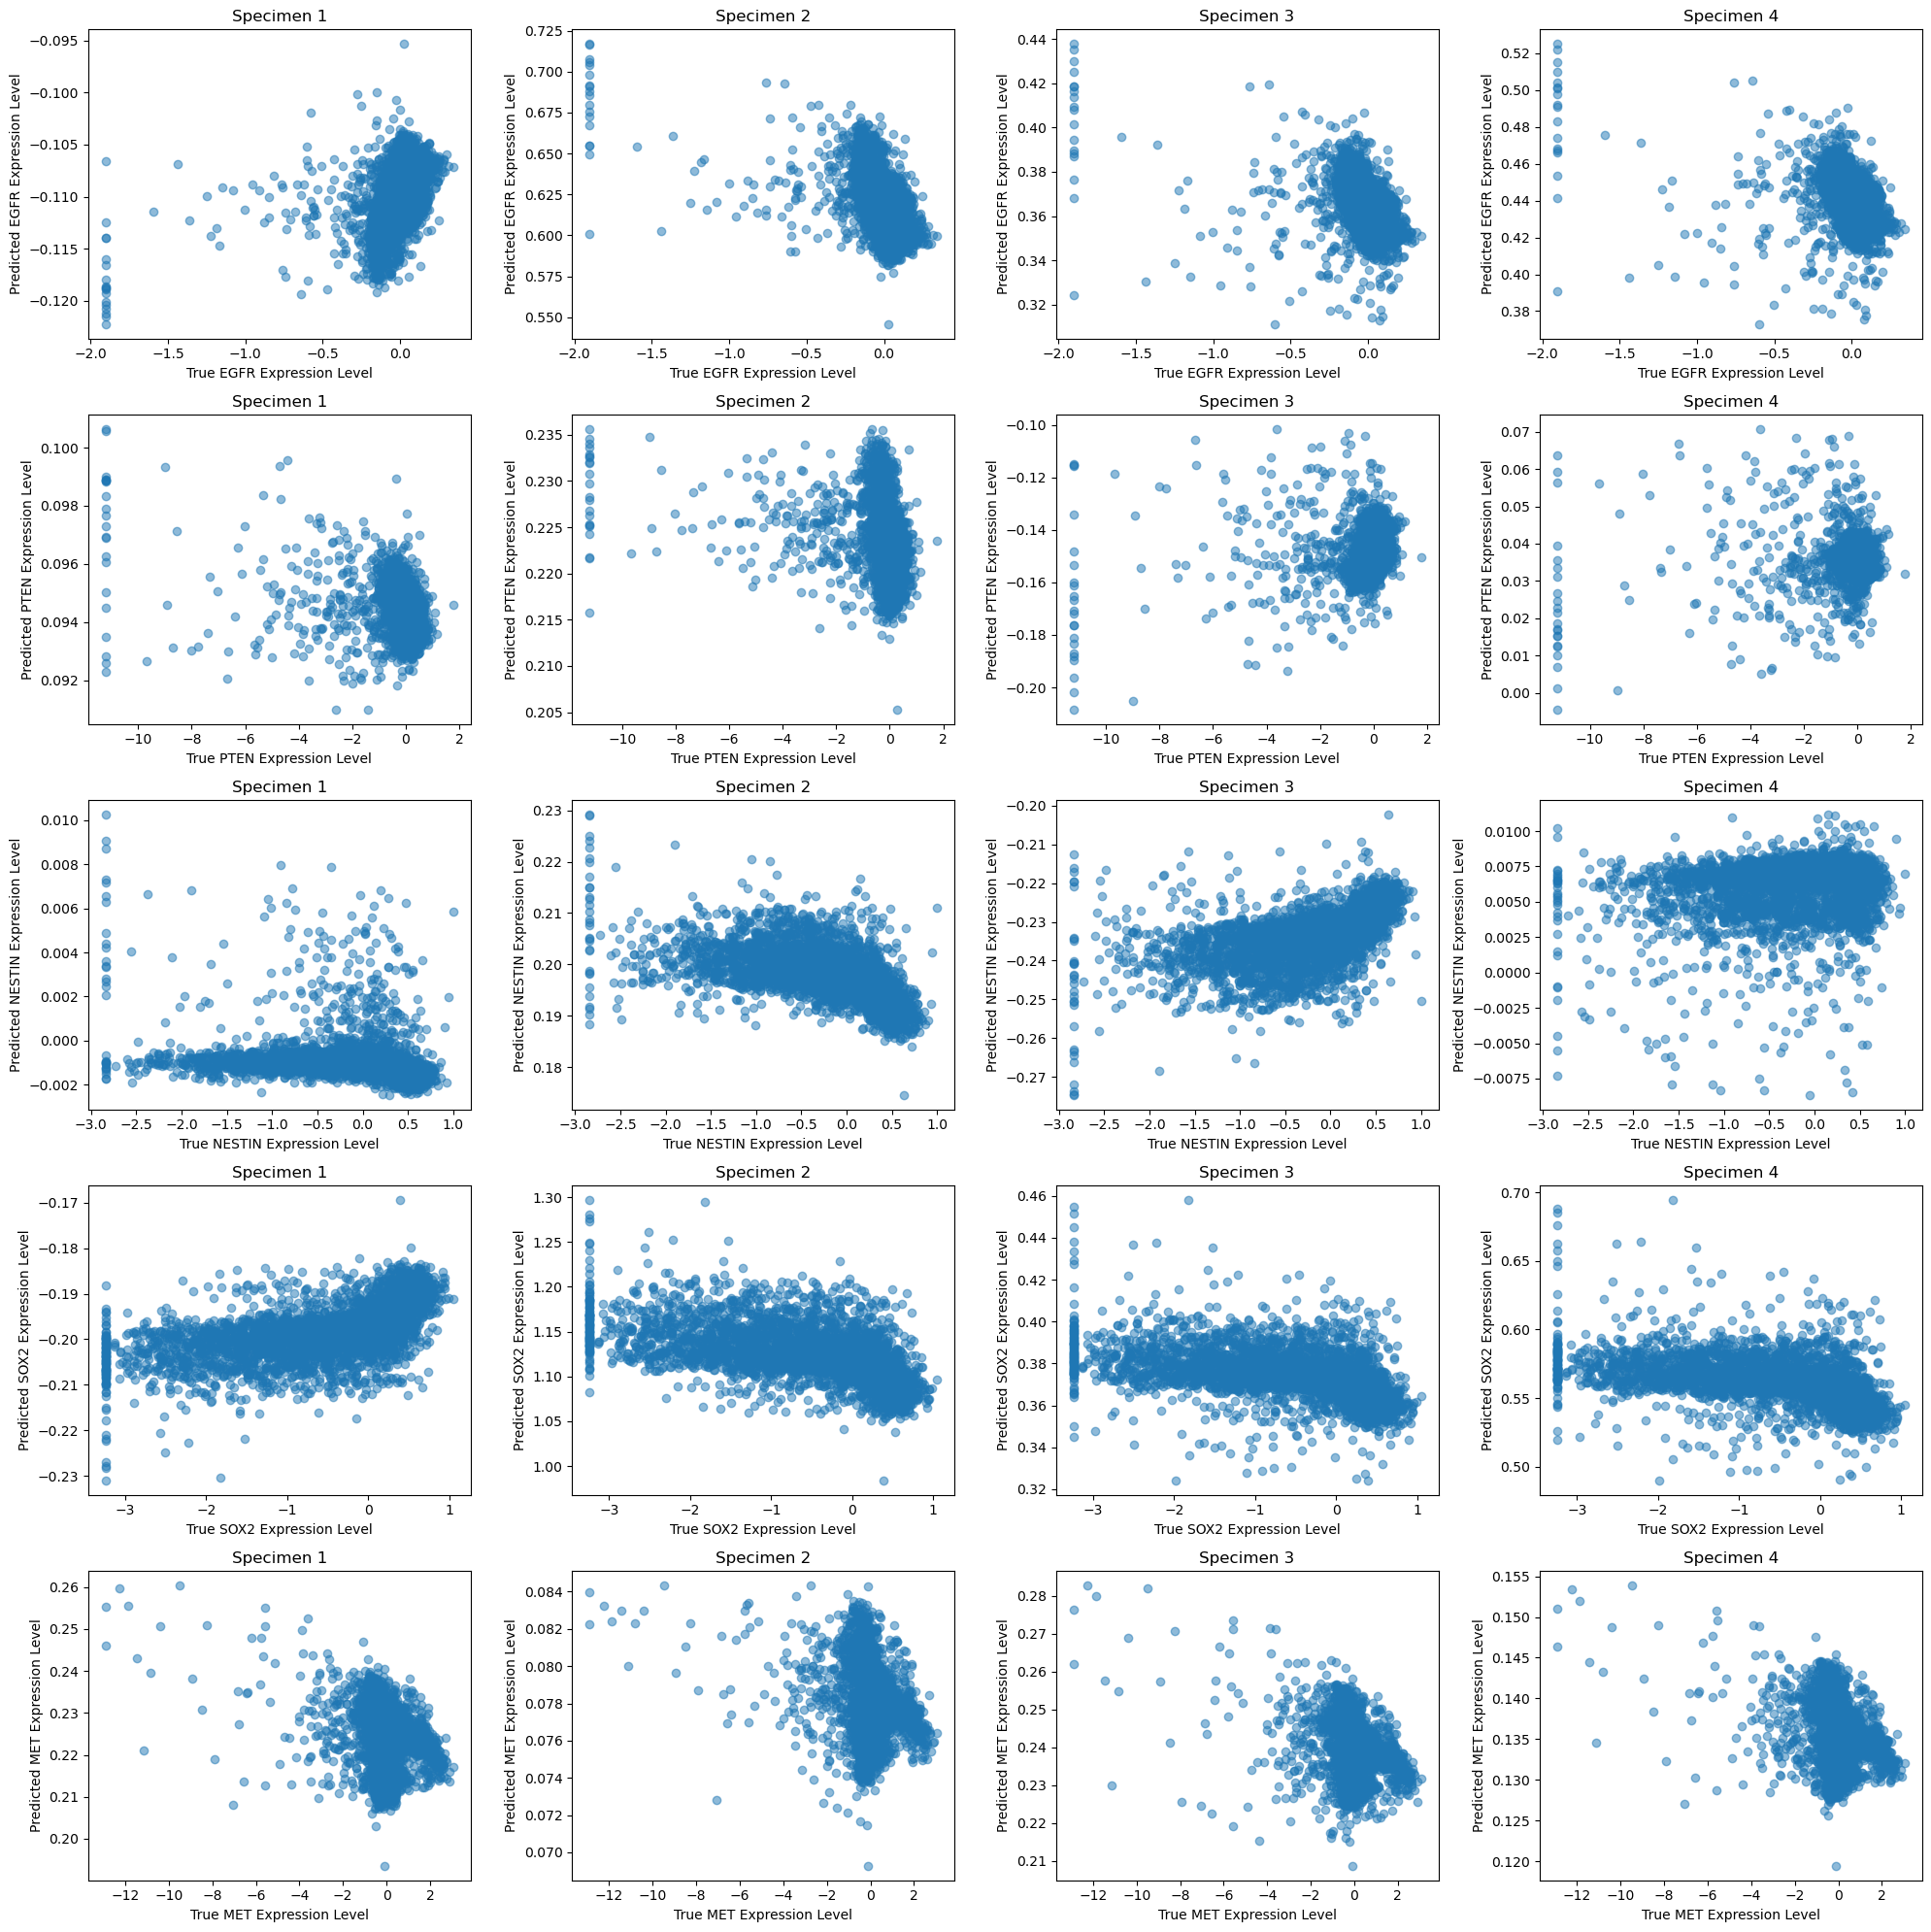

In [229]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import numpy as np
import matplotlib.pyplot as plt
from efficientnet_pytorch import EfficientNet

# Define your EfficientNet-B4 model
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Adjusted calculation for the size of the flattened tensor
        self.fc_input_size = 32 * 64 * 64  # 32 channels, 64x64 feature map size
        
        self.fc_layers = nn.Sequential(
            nn.Linear(self.fc_input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 5),  # Output 5 values for 5 proteins
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

# Define custom dataset class
class CustomDataset(Dataset):
    def __init__(self, df, image_folder, transform=None):
        self.df = df
        self.image_folder = image_folder
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        try:
            specimen_id = self.df["specimen_id"][idx]
            id_val = self.df['id'][idx]
        except KeyError as e:
            print(f"KeyError: {e}")
            return None

        image_path = self.image_folder + specimen_id + "_" + id_val + ".png"
        try:
            image = Image.open(image_path).convert('RGB')
        except:
            print(f"Error reading image: {image_path}")
            return None

        if self.transform:
            image = self.transform(image)

        label = self.df[['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']].iloc[idx].values.astype(np.float32)

        return image, label 

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

# Function to evaluate the model
def evaluate_model(model, data_loader, device):
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predictions.extend(outputs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    predictions = np.array(predictions)
    true_labels = np.array(true_labels)
    return predictions, true_labels

# Function to calculate performance metrics
def calculate_metrics(true_labels, predictions):
    metrics = {}
    for i, protein in enumerate(['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']):
        protein_preds = predictions[:, i]
        protein_labels = true_labels[:, i]

        rmse = np.sqrt(mean_squared_error(protein_labels, protein_preds))
        pearson_corr, _ = pearsonr(protein_labels, protein_preds)
        spearman_corr, _ = spearmanr(protein_labels, protein_preds)
        r2 = r2_score(protein_labels, protein_preds)

        metrics[protein] = {'RMSE': rmse, 'Pearson Correlation': pearson_corr,
                            'Spearman Correlation': spearman_corr, 'R2 Score': r2}
    return metrics

# Function to plot scatter plots
def plot_scatter_plots(true_labels, predictions):
    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    proteins = ['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']
    for i, protein in enumerate(proteins):
        for j in range(4):  # Four specimens
            ax = axes[i, j]
            ax.scatter(true_labels[j][:, i], predictions[j][:, i], alpha=0.5)
            ax.set_xlabel('True ' + protein + ' Expression Level')
            ax.set_ylabel('Predicted ' + protein + ' Expression Level')
            ax.set_title('Specimen ' + str(j+1))
    plt.tight_layout()
    plt.show()

# Create train and test datasets
train_dataset = CustomDataset(train_df, cnn_image_folder, transform=transforms.ToTensor())
test_dataset = CustomDataset(test_df, cnn_image_folder, transform=transforms.ToTensor())

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize model, criterion, and optimizer
model = CustomCNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Cross-validation loop
predictions_list = []
true_labels_list = []
for i in range(4):  # Four specimens
    train_indices = [idx for idx in range(4) if idx != i]
    train_subset = torch.utils.data.Subset(train_dataset, train_indices)
    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Train the model
    for epoch in range(5):  # 5 epochs
        train_loss = train_model(model, train_loader, criterion, optimizer, device)
        print(f'Specimen {i+1}, Epoch {epoch+1}, Train Loss: {train_loss:.4f}')

    # Evaluate the model
    predictions, true_labels = evaluate_model(model, test_loader, device)
    predictions_list.append(predictions)
    true_labels_list.append(true_labels)

# Calculate performance metrics
metrics_list = []
for true_labels, predictions in zip(true_labels_list, predictions_list):
    metrics = calculate_metrics(true_labels, predictions)
    metrics_list.append(metrics)

# Average and standard deviation of performance metrics
avg_metrics = {}
std_metrics = {}
for protein in ['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']:
    rmse_values = [metrics[protein]['RMSE'] for metrics in metrics_list]
    pearson_corr_values = [metrics[protein]['Pearson Correlation'] for metrics in metrics_list]
    spearman_corr_values = [metrics[protein]['Spearman Correlation'] for metrics in metrics_list]
    r2_values = [metrics[protein]['R2 Score'] for metrics in metrics_list]

    avg_metrics[protein] = {'RMSE': np.mean(rmse_values), 'Pearson Correlation': np.mean(pearson_corr_values),
                            'Spearman Correlation': np.mean(spearman_corr_values), 'R2 Score': np.mean(r2_values)}

    std_metrics[protein] = {'RMSE': np.std(rmse_values), 'Pearson Correlation': np.std(pearson_corr_values),
                            'Spearman Correlation': np.std(spearman_corr_values), 'R2 Score': np.std(r2_values)}

# Print average and standard deviation of performance metrics
for protein in ['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']:
    print(f"\nMetrics for {protein}:")
    print(f"Average: {avg_metrics[protein]}")
    print(f"Standard Deviation: {std_metrics[protein]}")

# Plot scatter plots
plot_scatter_plots(true_labels_list, predictions_list)


In [230]:
import pandas as pd

# Average and standard deviation of performance metrics
avg_metrics = {}
std_metrics = {}
for protein in ['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']:
    rmse_values = [metrics[protein]['RMSE'] for metrics in metrics_list]
    pearson_corr_values = [metrics[protein]['Pearson Correlation'] for metrics in metrics_list]
    spearman_corr_values = [metrics[protein]['Spearman Correlation'] for metrics in metrics_list]
    r2_values = [metrics[protein]['R2 Score'] for metrics in metrics_list]

    avg_metrics[protein] = {'RMSE': np.mean(rmse_values), 'Pearson Correlation': np.mean(pearson_corr_values),
                            'Spearman Correlation': np.mean(spearman_corr_values), 'R2 Score': np.mean(r2_values)}

    std_metrics[protein] = {'RMSE': np.std(rmse_values), 'Pearson Correlation': np.std(pearson_corr_values),
                            'Spearman Correlation': np.std(spearman_corr_values), 'R2 Score': np.std(r2_values)}

# Create a DataFrame for average metrics
avg_metrics_df = pd.DataFrame(avg_metrics).transpose()

# Create a DataFrame for standard deviation metrics
std_metrics_df = pd.DataFrame(std_metrics).transpose()

# Combine both DataFrames
performance_metrics_df = pd.concat([avg_metrics_df, std_metrics_df.add_suffix('_std')], axis=1)

# Display the consolidated table
print("Consolidated Performance Metrics Table:")
print(performance_metrics_df)


Consolidated Performance Metrics Table:
            RMSE  Pearson Correlation  Spearman Correlation  R2 Score  \
EGFR    0.460790            -0.207943             -0.255800 -6.463412   
PTEN    1.194853            -0.089753             -0.141602 -0.062891   
NESTIN  0.717739            -0.011259             -0.042780 -0.181943   
SOX2    1.425632            -0.228054             -0.269667 -1.314399   
MET     1.098593            -0.253091             -0.069959 -0.039612   

        RMSE_std  Pearson Correlation_std  Spearman Correlation_std  \
EGFR    0.177957                 0.349373                  0.447142   
PTEN    0.028302                 0.198309                  0.242863   
NESTIN  0.050864                 0.406527                  0.461478   
SOX2    0.325448                 0.453711                  0.504371   
MET     0.011934                 0.028236                  0.015717   

        R2 Score_std  
EGFR        4.789171  
PTEN        0.050542  
NESTIN      0.170397  
SO

##  Discussing limitations and possible extensions of the optimal pipeline, e.g., is there any additional information we can utilize to improve prediction performance and how that can be used?


Limitations:

1) Limited Expressive Power of MLPs: While Multi-Layer Perceptrons (MLPs) offer more flexibility than OLS regression in modeling non-linear relationships, they might still struggle to capture very intricate or high-dimensional relationships between image features and NESTIN expression. The architecture of the MLP (number of layers, neurons) plays a crucial role in its ability to model complex patterns.

2) Computational Cost of Deep Learning: Similar to the previous point about large pre-trained models, training and using a complex MLP architecture (many layers, neurons) can be computationally expensive. It requires significant processing power and memory, which could be a limiting factor depending on your available resources. Additionally, training a complex MLP can take longer compared to simpler models.

Possible Extensions:

Exploring Deeper or Wider MLP Architectures: We could experiment with increasing the depth (more hidden layers) or width (more neurons per layer) of the MLP. This might allow the model to capture more complex non-linear relationships between the image features and NESTIN expression, potentially leading to improved prediction accuracy. However, be mindful of the computational cost and the risk of overfitting, especially with limited data. Techniques like regularization (e.g., L1/L2 regularization) can help mitigate overfitting during training.

